Note: There is a cleaner version you should use. This was data exploring, and the clean version has the analysis for the paper.

In [1]:
import os
import sys

import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from matplotlib.collections import PatchCollection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandas as pd
import seaborn as sns
import json
from natsort import natsorted

# Read the Adelaide and Worldwide data

We read the Adelaide data, and create a column called 'geo_loc_name_country_calc' that we set to "Adelaide" for every entry. Then we read the world wide data

In [2]:
os.listdir()

['README.md',
 'bigquery_json.py',
 'fastp.pbs',
 'fastp.sh',
 'fastqdump.sh',
 'fastqdump.slurm',
 'mash.sh',
 'split_fasta.slurm',
 '.ipynb_checkpoints',
 'Adelaide',
 'OtherSequences',
 'Worldwide_phylum.png',
 'Worldwide_ss.png',
 'Worldwide_taxonomy_genus.png',
 'mash_distances.png',
 'subsystems_data.tsv',
 'taxonomy_data.tsv',
 'mash_paste.slurm',
 'mash_reads.slurm',
 'AdelaideMinION.msh',
 'AdelaideMGI.msh',
 'Data Exploring WorldWideAnalysis.ipynb',
 'Worldwide CF Analysis.ipynb',
 'cf_sputum_sra_ids.txt']

In [3]:
if not os.path.exists(os.path.join("Adelaide", "subsystems", "level2_norm_ss.tsv.gz")):
    print(f"We are not in the right path. Trying to change!")
    os.chdir("/home/edwa0468/GitHubs/CF_Data_Analysis/WorldWideDataAnalysis")

adl = pd.read_csv("Adelaide/subsystems/level2_norm_ss.tsv.gz", compression='gzip', delimiter="\t")
adl = adl.set_index("Unnamed: 0")
adl = adl.reindex(natsorted(adl.columns), axis=1)
adl = adl.T
adl['geo_loc_name_country_calc'] = "Adelaide"
adl.head(3)

Unnamed: 0         Amino Acids and Derivatives;   \
623361_20180123_S                    1182.347902   
634207_20180510_S                    1547.319643   
634207_20180517_S                    1276.273834   

Unnamed: 0         Amino Acids and Derivatives; Alanine, serine, and glycine  \
623361_20180123_S                                        2934.411456           
634207_20180510_S                                        4149.806390           
634207_20180517_S                                        3771.513090           

Unnamed: 0         Amino Acids and Derivatives; Arginine; urea cycle, creatine, polyamines  \
623361_20180123_S                                        9058.024354                         
634207_20180510_S                                       10620.637379                         
634207_20180517_S                                        7642.596780                         

Unnamed: 0         Amino Acids and Derivatives; Aromatic amino acids and derivatives  \
623361_20180123_S                                       17292.417136                   
634207_20180510_S                                        9983.781882                   
634207_20180517_S                                       12117.668359                   

Unnamed: 0         Amino Acids and Derivatives; Branched-chain amino acids  \
623361_20180123_S                                        9988.973643         
634207_20180510_S                                        4824.133002         
634207_20180517_S                                        7237.676337         

Unnamed: 0         Amino Acids and Derivatives; Glutamine, glutamate, aspartate, asparagine; ammonia assimilation  \
623361_20180123_S                                        5854.713004                                                
634207_20180510_S                                        6270.366907                                                
634207_20180517_S                                        7658.802027                                                

Unnamed: 0         Amino Acids and Derivatives; Histidine Metabolism  \
623361_20180123_S                                        5343.125180   
634207_20180510_S                                        4669.202444   
634207_20180517_S                                        4423.884915   

Unnamed: 0         Amino Acids and Derivatives; Lysine, threonine, methionine, and cysteine  \
623361_20180123_S                                       17334.572048                          
634207_20180510_S                                       16859.351724                          
634207_20180517_S                                       15807.596776                          

Unnamed: 0         Amino Acids and Derivatives; Proline and 4-hydroxyproline  \
623361_20180123_S                                        3624.573283           
634207_20180510_S                                        2862.374341           
634207_20180517_S                                        2826.477454           

Unnamed: 0         Carbohydrates;   ...  \
623361_20180123_S         2.097756  ...   
634207_20180510_S         1.624862  ...   
634207_20180517_S         7.080576  ...   

Unnamed: 0         Stress Response, Defense and Virulence; Host-pathogen interactions  \
623361_20180123_S                                          77.616984                    
634207_20180510_S                                          66.619328                    
634207_20180517_S                                           0.000000                    

Unnamed: 0         Stress Response, Defense and Virulence; Invasion and intracellular resistance  \
623361_20180123_S                                         611.495965                               
634207_20180510_S                                          14.623755                               
634207_20180517_S                                          56.644608                               

Unnamed: 0         Stress Response, 

Read the worldwide data and set the acccession 

In [4]:
wlt = pd.read_csv("OtherSequences/subsystems/level2_norm_ss.tsv.gz", compression='gzip', delimiter="\t")
wlt = wlt.rename(columns={"Unnamed: 0":"Accession"})
wlt = wlt.set_index('Accession')
wlt = wlt.reindex(natsorted(wlt.columns), axis=1)
wlt = wlt.T

# read the list of selected ids
srr_wanted = set()
with open("cf_sputum_sra_ids.txt", 'r') as f:
    for l in f:
        srr_wanted.add(l.strip())
wlt = wlt[wlt.index.isin(srr_wanted)]

wlt

Accession    Amino Acids and Derivatives;   \
SRR1177122                      815.700596   
SRR1180012                      953.558394   
SRR1180013                      564.102476   
SRR3284698                      367.839874   
SRR3284701                      173.671453   
...                                    ...   
SRR20794687                     584.459918   
SRR20794691                     627.175637   
SRR20794692                     580.154098   
SRR20794693                    1510.690836   
SRR20794695                     908.657573   

Accession    Amino Acids and Derivatives; Alanine, serine, and glycine  \
SRR1177122                                         4010.859516           
SRR1180012                                         3298.626853           
SRR1180013                                         4982.905201           
SRR3284698                                         5392.074113           
SRR3284701                                         2797.162945           
...                                                        ...           
SRR20794687                                        5192.733358           
SRR20794691                                        6347.237367           
SRR20794692                                        6496.431042           
SRR20794693                                        4427.276937           
SRR20794695                                        3177.041747           

Accession    Amino Acids and Derivatives; Arginine; urea cycle, creatine, polyamines  \
SRR1177122                                        15304.134791                         
SRR1180012                                        12712.589278                         
SRR1180013                                        19941.694061                         
SRR3284698                                        23070.218309                         
SRR3284701                                         6299.537245                         
...                                                        ...                         
SRR20794687                                       23879.316467                         
SRR20794691                                       29800.984551                         
SRR20794692                                       30118.115129                         
SRR20794693                                       25065.398465                         
SRR20794695                                        9016.490930                         

Accession    Amino Acids and Derivatives; Aromatic amino acids and derivatives  \
SRR1177122                                        17587.300655                   
SRR1180012                                        18503.029803                   
SRR1180013                                        15351.645942                   
SRR3284698                                        11326.630175                   
SRR3284701                                         7178.420051                   
...                                                        ...                   
SRR20794687                                       12107.427102                   
SRR20794691                                       11044.764563                   
SRR20794692                                       10690.803704                   
SRR20794693                                       16987.294673                   
SRR20794695                                       13298.998146                   

Accession    Amino Acids and Derivatives; Branched-chain amino acids  \
SRR1177122                                        11873.417456         
SRR1180012                                        10920.127893         
SRR1180013                                        12701.035857         
SRR3284698                                        11495.378082         
SRR3284701                                         3930.763883         
...                                                        ...         
SRR20794687 

## Remove some 16S data

Some of the libararies are just 16S sequences, so we need to remove those. I scanned the 16S database from partie

In [5]:
six = pd.read_csv("OtherSequences/16S.tsv.gz", compression='gzip', delimiter="\t")
sr = six[six["Aligned 1 time"] > 1]
wlt = wlt[~wlt.index.isin(sr['Run'])]

# Filter out samples that are mostly Eukaryotic

We used a Google BigQuery to get a list of the taxonomies and the number of k-mers in that taxonomy. We uploaded a list of SRA IDs and then searched the taxonomy table using this query:

```
create temp table SRARUN(acc STRING) as SELECT string_field_0 FROM `sra-searches.cystic_fibrosis.sra_run_ids` WHERE string_field_0 IS NOT NULL;

SELECT * FROM `nih-sra-datastore.sra_tax_analysis_tool.tax_analysis` WHERE acc in (select acc from SRARUN) and (tax_id = 131567 OR rank = 'superkingdom')
```

Next, we download that as a newline delimited json file, and read that into a pandas dataframe

In [6]:
taxpreds = pd.read_json("OtherSequences/NCBI_taxonomy_predictions/bq-results-20240918-074645-1726645634800.json.gz", compression='gzip', lines=True)

Now we group these by accession and name, and calculate the percent Eukaryote (hopefully human). We filter out anything more than 75% human, because that becomes the dominant marker.

In [7]:
aggregated_taxonomy = taxpreds.groupby(['acc', 'name'])['total_count'].sum().unstack(fill_value=0)
aggregated_taxonomy['Euk %'] = aggregated_taxonomy['Eukaryota']/aggregated_taxonomy['cellular organisms'] * 100
mainly_euks = aggregated_taxonomy[aggregated_taxonomy['Euk %'] > 75]
mainly_euks.head()

name         Archaea  Bacteria  Eukaryota  Viruses  cellular organisms  \
acc                                                                      
SRR10377519        0      7242      49263        7               58316   
SRR10590818        1    259099   24462176     4490            25766450   
SRR11440792        0    490697    4470641       56             5035993   
SRR12149829        0   1152222   10550797       32            12312288   
SRR12149832        0    323504    9138267       21             9910793   

name             Euk %  
acc                     
SRR10377519  84.475959  
SRR10590818  94.938092  
SRR11440792  88.773773  
SRR12149829  85.693228  
SRR12149832  92.205205

In [8]:
wlt = wlt[~wlt.index.isin(mainly_euks.index)]

## Read the worldwide metadata

We really only want the `geo_loc_name_country_calc` column at the moment, but we may use some other stuff later

In [9]:
wmd = pd.read_csv("OtherSequences/bigquery.tsv.gz", compression='gzip', delimiter="\t")
wma = wmd[['Accession', 'geo_loc_name_country_calc']]
wma = wma.set_index("Accession")
wma.head(3)

geo_loc_name_country_calc
Accession                            
ERR10814733                   Germany
ERR10814734                   Germany
ERR10814735                   Germany

## Merge the worldwide data and their location. 

We use an inner join to just keep entries with measurements

In [10]:
wldj = wlt.join(wma,  how='inner')
wldj.head(3)

Amino Acids and Derivatives;   \
SRR1177122                     815.700596   
SRR1180012                     953.558394   
SRR1180013                     564.102476   

            Amino Acids and Derivatives; Alanine, serine, and glycine  \
SRR1177122                                        4010.859516           
SRR1180012                                        3298.626853           
SRR1180013                                        4982.905201           

            Amino Acids and Derivatives; Arginine; urea cycle, creatine, polyamines  \
SRR1177122                                       15304.134791                         
SRR1180012                                       12712.589278                         
SRR1180013                                       19941.694061                         

            Amino Acids and Derivatives; Aromatic amino acids and derivatives  \
SRR1177122                                       17587.300655                   
SRR1180012                                       18503.029803                   
SRR1180013                                       15351.645942                   

            Amino Acids and Derivatives; Branched-chain amino acids  \
SRR1177122                                       11873.417456         
SRR1180012                                       10920.127893         
SRR1180013                                       12701.035857         

            Amino Acids and Derivatives; Glutamine, glutamate, aspartate, asparagine; ammonia assimilation  \
SRR1177122                                        4695.479584                                                
SRR1180012                                        4879.706610                                                
SRR1180013                                        4118.523686                                                

            Amino Acids and Derivatives; Histidine Metabolism  \
SRR1177122                                        6901.224945   
SRR1180012                                        6304.676867   
SRR1180013                                        6831.012359   

            Amino Acids and Derivatives; Lysine, threonine, methionine, and cysteine  \
SRR1177122                                       18034.657009                          
SRR1180012                                       17650.537179                          
SRR1180013                                       20416.096568                          

            Amino Acids and Derivatives; Proline and 4-hydroxyproline  \
SRR1177122                                        4342.710392           
SRR1180012                                        3878.755792           
SRR1180013                                        5701.464306           

            Carbohydrates;   ...  \
SRR1177122              0.0  ...   
SRR1180012              0.0  ...   
SRR1180013              0.0  ...   

            Stress Response, Defense and Virulence; Host-pathogen interactions  \
SRR1177122                                          19.099331                    
SRR1180012                                           6.851917                    
SRR1180013                                           0.000000                    

            Stress Response, Defense and Virulence; Invasion and intracellular resistance  \
SRR1177122                                         162.344314                               
SRR1180012                                         171.297915                               
SRR1180013                                         483.516408                               

            Stress Response, Defense and Virulence; Resistance to antibiotics and toxic compounds  \
SRR1177122                                       45799.399999                                       
SRR1180012                                       47160.029025                                       
SRR1180013                                       43407.685493                    

## Concatenate the Adelaide and worldwide data to get a single matrix

Note that the worldwide data appears to have two (?) additional columns that are not in the Adelaide data frame, but they don't seem to contribute a lot. We should probably drop them!

In [11]:
comb = pd.concat([adl, wldj], axis=0)
comb = comb.drop(['Carbohydrates; CO', 'Membrane Transport; Multid'], axis=1)
comb

Amino Acids and Derivatives;   \
623361_20180123_S                    1182.347902   
634207_20180510_S                    1547.319643   
634207_20180517_S                    1276.273834   
639354_20171206_S                     709.462968   
642660_20180601_S                     910.075437   
...                                          ...   
SRR20794673                          1192.719513   
SRR20794675                           561.607851   
SRR20794687                           584.459918   
SRR20794691                           627.175637   
SRR20794692                           580.154098   

                   Amino Acids and Derivatives; Alanine, serine, and glycine  \
623361_20180123_S                                        2934.411456           
634207_20180510_S                                        4149.806390           
634207_20180517_S                                        3771.513090           
639354_20171206_S                                        5869.914274           
642660_20180601_S                                        2753.645446           
...                                                              ...           
SRR20794673                                              2773.612496           
SRR20794675                                              5070.500899           
SRR20794687                                              5192.733358           
SRR20794691                                              6347.237367           
SRR20794692                                              6496.431042           

                   Amino Acids and Derivatives; Arginine; urea cycle, creatine, polyamines  \
623361_20180123_S                                        9058.024354                         
634207_20180510_S                                       10620.637379                         
634207_20180517_S                                        7642.596780                         
639354_20171206_S                                       23266.509937                         
642660_20180601_S                                       10822.257045                         
...                                                              ...                         
SRR20794673                                             12272.839113                         
SRR20794675                                             22757.635259                         
SRR20794687                                             23879.316467                         
SRR20794691                                             29800.984551                         
SRR20794692                                             30118.115129                         

                   Amino Acids and Derivatives; Aromatic amino acids and derivatives  \
623361_20180123_S                                       17292.417136                   
634207_20180510_S                                        9983.781882                   
634207_20180517_S                                       12117.668359                   
639354_20171206_S                                       11103.469773                   
642660_20180601_S                                       23311.328505                   
...                                                              ...                   
SRR20794673                                             22339.185283                   
SRR20794675                                             14366.093704                   
SRR20794687                                             12107.427102                   
SRR20794691                                             11044.764563                   
SRR20794692                                             10690.803704                   

                   Amino Acids and Derivatives; Branched-chain amino acids  \
623361_20180123_S                                        9988.973643         
634207_20180510_S                                        4824.133002         
634207_201805

Of course, we don't want a single matrix because we want the labels separately, so we pull them out into a separate matrix that we'll use later

In [12]:
locs = comb[['geo_loc_name_country_calc']]
locs = locs.rename(columns={"geo_loc_name_country_calc": "Country"})
locs

Country
623361_20180123_S  Adelaide
634207_20180510_S  Adelaide
634207_20180517_S  Adelaide
639354_20171206_S  Adelaide
642660_20180601_S  Adelaide
...                     ...
SRR20794673             USA
SRR20794675             USA
SRR20794687             USA
SRR20794691             USA
SRR20794692             USA

[425 rows x 1 columns]

In [13]:
df = comb.drop(['geo_loc_name_country_calc'], axis=1)
df

Amino Acids and Derivatives;   \
623361_20180123_S                    1182.347902   
634207_20180510_S                    1547.319643   
634207_20180517_S                    1276.273834   
639354_20171206_S                     709.462968   
642660_20180601_S                     910.075437   
...                                          ...   
SRR20794673                          1192.719513   
SRR20794675                           561.607851   
SRR20794687                           584.459918   
SRR20794691                           627.175637   
SRR20794692                           580.154098   

                   Amino Acids and Derivatives; Alanine, serine, and glycine  \
623361_20180123_S                                        2934.411456           
634207_20180510_S                                        4149.806390           
634207_20180517_S                                        3771.513090           
639354_20171206_S                                        5869.914274           
642660_20180601_S                                        2753.645446           
...                                                              ...           
SRR20794673                                              2773.612496           
SRR20794675                                              5070.500899           
SRR20794687                                              5192.733358           
SRR20794691                                              6347.237367           
SRR20794692                                              6496.431042           

                   Amino Acids and Derivatives; Arginine; urea cycle, creatine, polyamines  \
623361_20180123_S                                        9058.024354                         
634207_20180510_S                                       10620.637379                         
634207_20180517_S                                        7642.596780                         
639354_20171206_S                                       23266.509937                         
642660_20180601_S                                       10822.257045                         
...                                                              ...                         
SRR20794673                                             12272.839113                         
SRR20794675                                             22757.635259                         
SRR20794687                                             23879.316467                         
SRR20794691                                             29800.984551                         
SRR20794692                                             30118.115129                         

                   Amino Acids and Derivatives; Aromatic amino acids and derivatives  \
623361_20180123_S                                       17292.417136                   
634207_20180510_S                                        9983.781882                   
634207_20180517_S                                       12117.668359                   
639354_20171206_S                                       11103.469773                   
642660_20180601_S                                       23311.328505                   
...                                                              ...                   
SRR20794673                                             22339.185283                   
SRR20794675                                             14366.093704                   
SRR20794687                                             12107.427102                   
SRR20794691                                             11044.764563                   
SRR20794692                                             10690.803704                   

                   Amino Acids and Derivatives; Branched-chain amino acids  \
623361_20180123_S                                        9988.973643         
634207_20180510_S                                        4824.133002         
634207_201805

In [14]:
comb.to_csv('subsystems_data.tsv', sep="\t")

# Start the PCA!

Standardise the data

In [15]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled

array([[ 0.64868457, -0.51719089, -0.80985744, ..., -0.72215814,
        -0.4650161 , -0.6509954 ],
       [ 1.64857001,  0.23889121, -0.64317836, ..., -1.27008883,
        -0.52056046, -1.10045528],
       [ 0.90600633,  0.00355964, -0.96083671, ..., -1.21990324,
        -0.48273429, -1.06213803],
       ...,
       [-0.98930387,  0.88768313,  0.77108377, ...,  1.60062429,
         1.50323221,  0.07148618],
       [-0.87227885,  1.60588575,  1.40272972, ...,  1.73273439,
         0.39164083,  1.61422455],
       [-1.0011002 ,  1.69869728,  1.43655706, ...,  1.83333436,
         0.1760156 ,  1.92448588]])

In [16]:
pca = PCA(n_components=4)
pca.fit(df_scaled)
dft_pca = pca.transform(df_scaled)
zipped = list(zip(dft_pca[:,0],
                  dft_pca[:,1],
                  dft_pca[:,2],
                  dft_pca[:,3],
                  list(df.index),
                 ))
pct_df = pd.DataFrame(zipped, columns=['PC1', 'PC2', 'PC3', 'PC4', "Accession"])
pct_df.head(3)

PC1       PC2       PC3       PC4          Accession
0 -4.596465 -2.075882  0.005311 -1.247692  623361_20180123_S
1 -2.667787 -4.512040  2.004475  4.344643  634207_20180510_S
2 -2.588357 -3.966663  1.568131  3.711576  634207_20180517_S

In [17]:
pcloc = pct_df.set_index("Accession").join(locs, how="inner")
pcloc = pcloc[pcloc['Country'] != 'uncalculated']
pcloc

PC1        PC2       PC3       PC4   Country
623361_20180123_S  -4.596465  -2.075882  0.005311 -1.247692  Adelaide
634207_20180510_S  -2.667787  -4.512040  2.004475  4.344643  Adelaide
634207_20180517_S  -2.588357  -3.966663  1.568131  3.711576  Adelaide
639354_20171206_S   6.502992  -3.065146 -1.565400  0.002059  Adelaide
642660_20180601_S  -5.759493  -2.726170 -1.139662 -5.475044  Adelaide
...                      ...        ...       ...       ...       ...
SRR20794673        -5.165594  -1.474435 -0.909630 -3.842315       USA
SRR20794675        -0.570827  10.596376 -1.539241  0.358744       USA
SRR20794687         0.984705  11.564430 -1.221704  0.501904       USA
SRR20794691         9.812050   4.233734 -2.063491 -0.894820       USA
SRR20794692        11.154153   2.669054 -2.034750 -1.064700       USA

[425 rows x 5 columns]

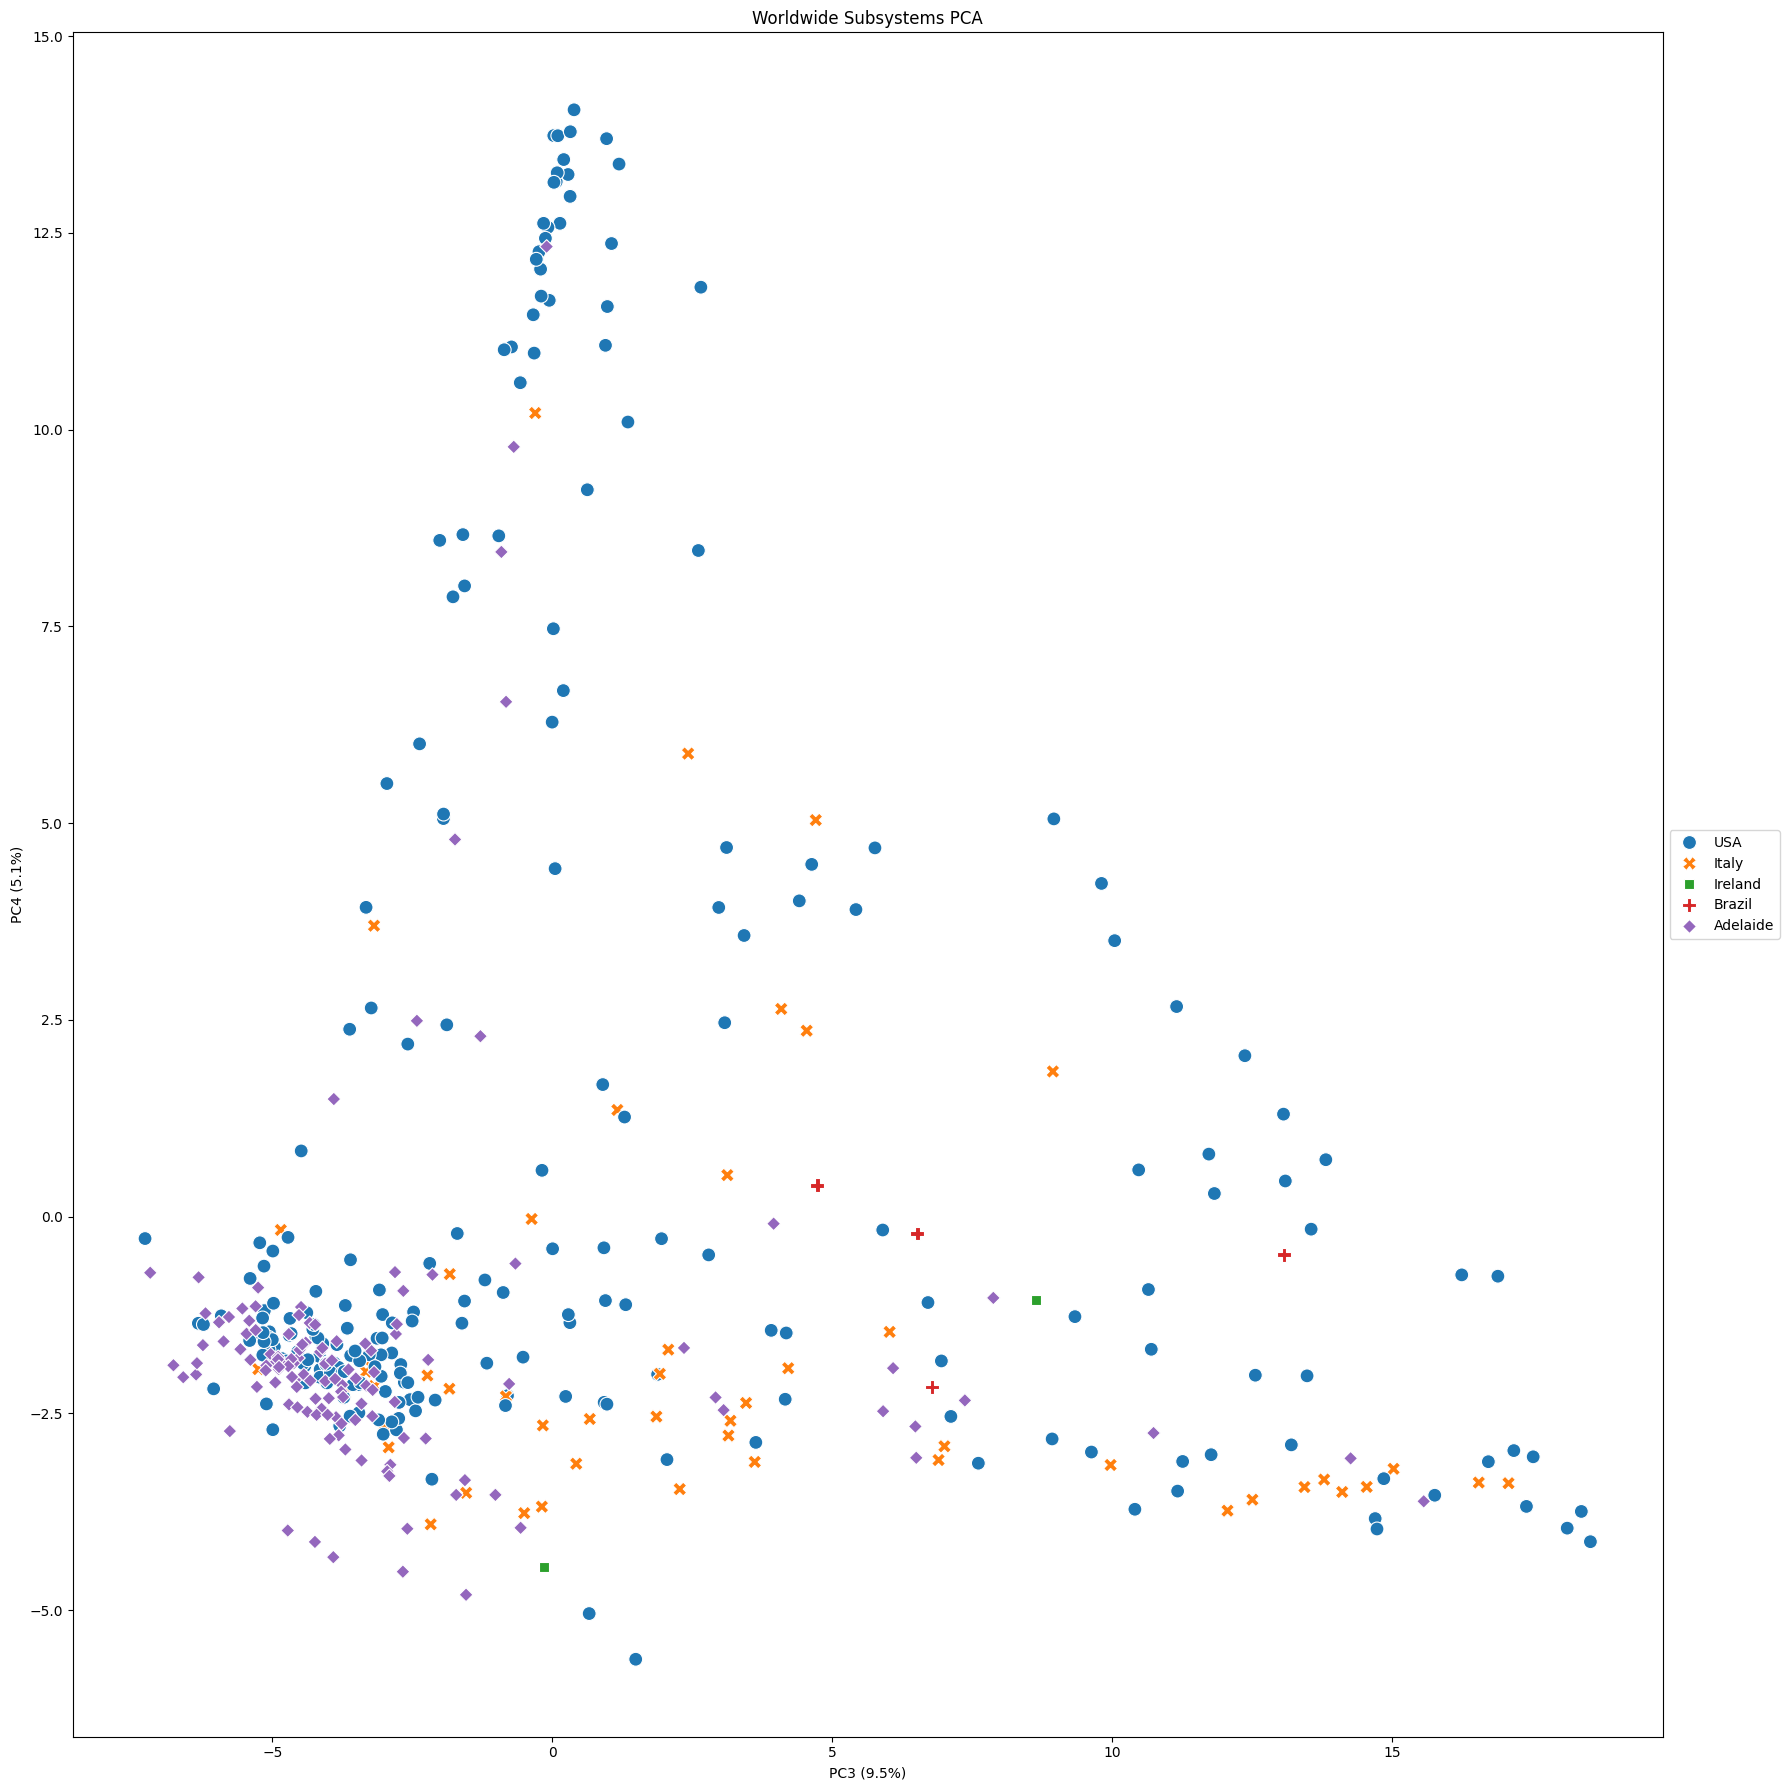

In [18]:
fig, ax = plt.subplots(figsize=(18, 18))
# pd.concat([df[df['label'] != 'dog'], df[df['label'] == 'dog']]).
dfat = pd.concat([pcloc[pcloc['Country'] != "Adelaide"], pcloc[pcloc['Country'] == "Adelaide"]])
sns.scatterplot(x="PC1", y="PC2", hue='Country', style='Country', legend=True, data=dfat, ax=ax, s=100)
l = ax.set_xlabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)")
l = ax.set_ylabel(f"PC4 ({pca.explained_variance_ratio_[3]*100:.1f}%)")
t = ax.set_title(f"Worldwide Subsystems PCA")
ax.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
fig.savefig("Worldwide_ss.png")

## Loadings


In [19]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=df.columns)
loadings.head(3)

PC1       PC2  \
Amino Acids and Derivatives;                       -0.101321 -0.086034   
Amino Acids and Derivatives; Alanine, serine, a...  0.135975  0.035385   
Amino Acids and Derivatives; Arginine; urea cyc...  0.120487  0.080540   

                                                         PC3       PC4  
Amino Acids and Derivatives;                       -0.074104  0.049918  
Amino Acids and Derivatives; Alanine, serine, a... -0.100113  0.010276  
Amino Acids and Derivatives; Arginine; urea cyc...  0.053494 -0.106162

For PC1, maximum for loading is 0.15296832506292846 and maximum for PCA is 18.54602627667923
For PC2, maximum for loading is 0.08289117288126 and maximum for PCA is 14.064383996224622


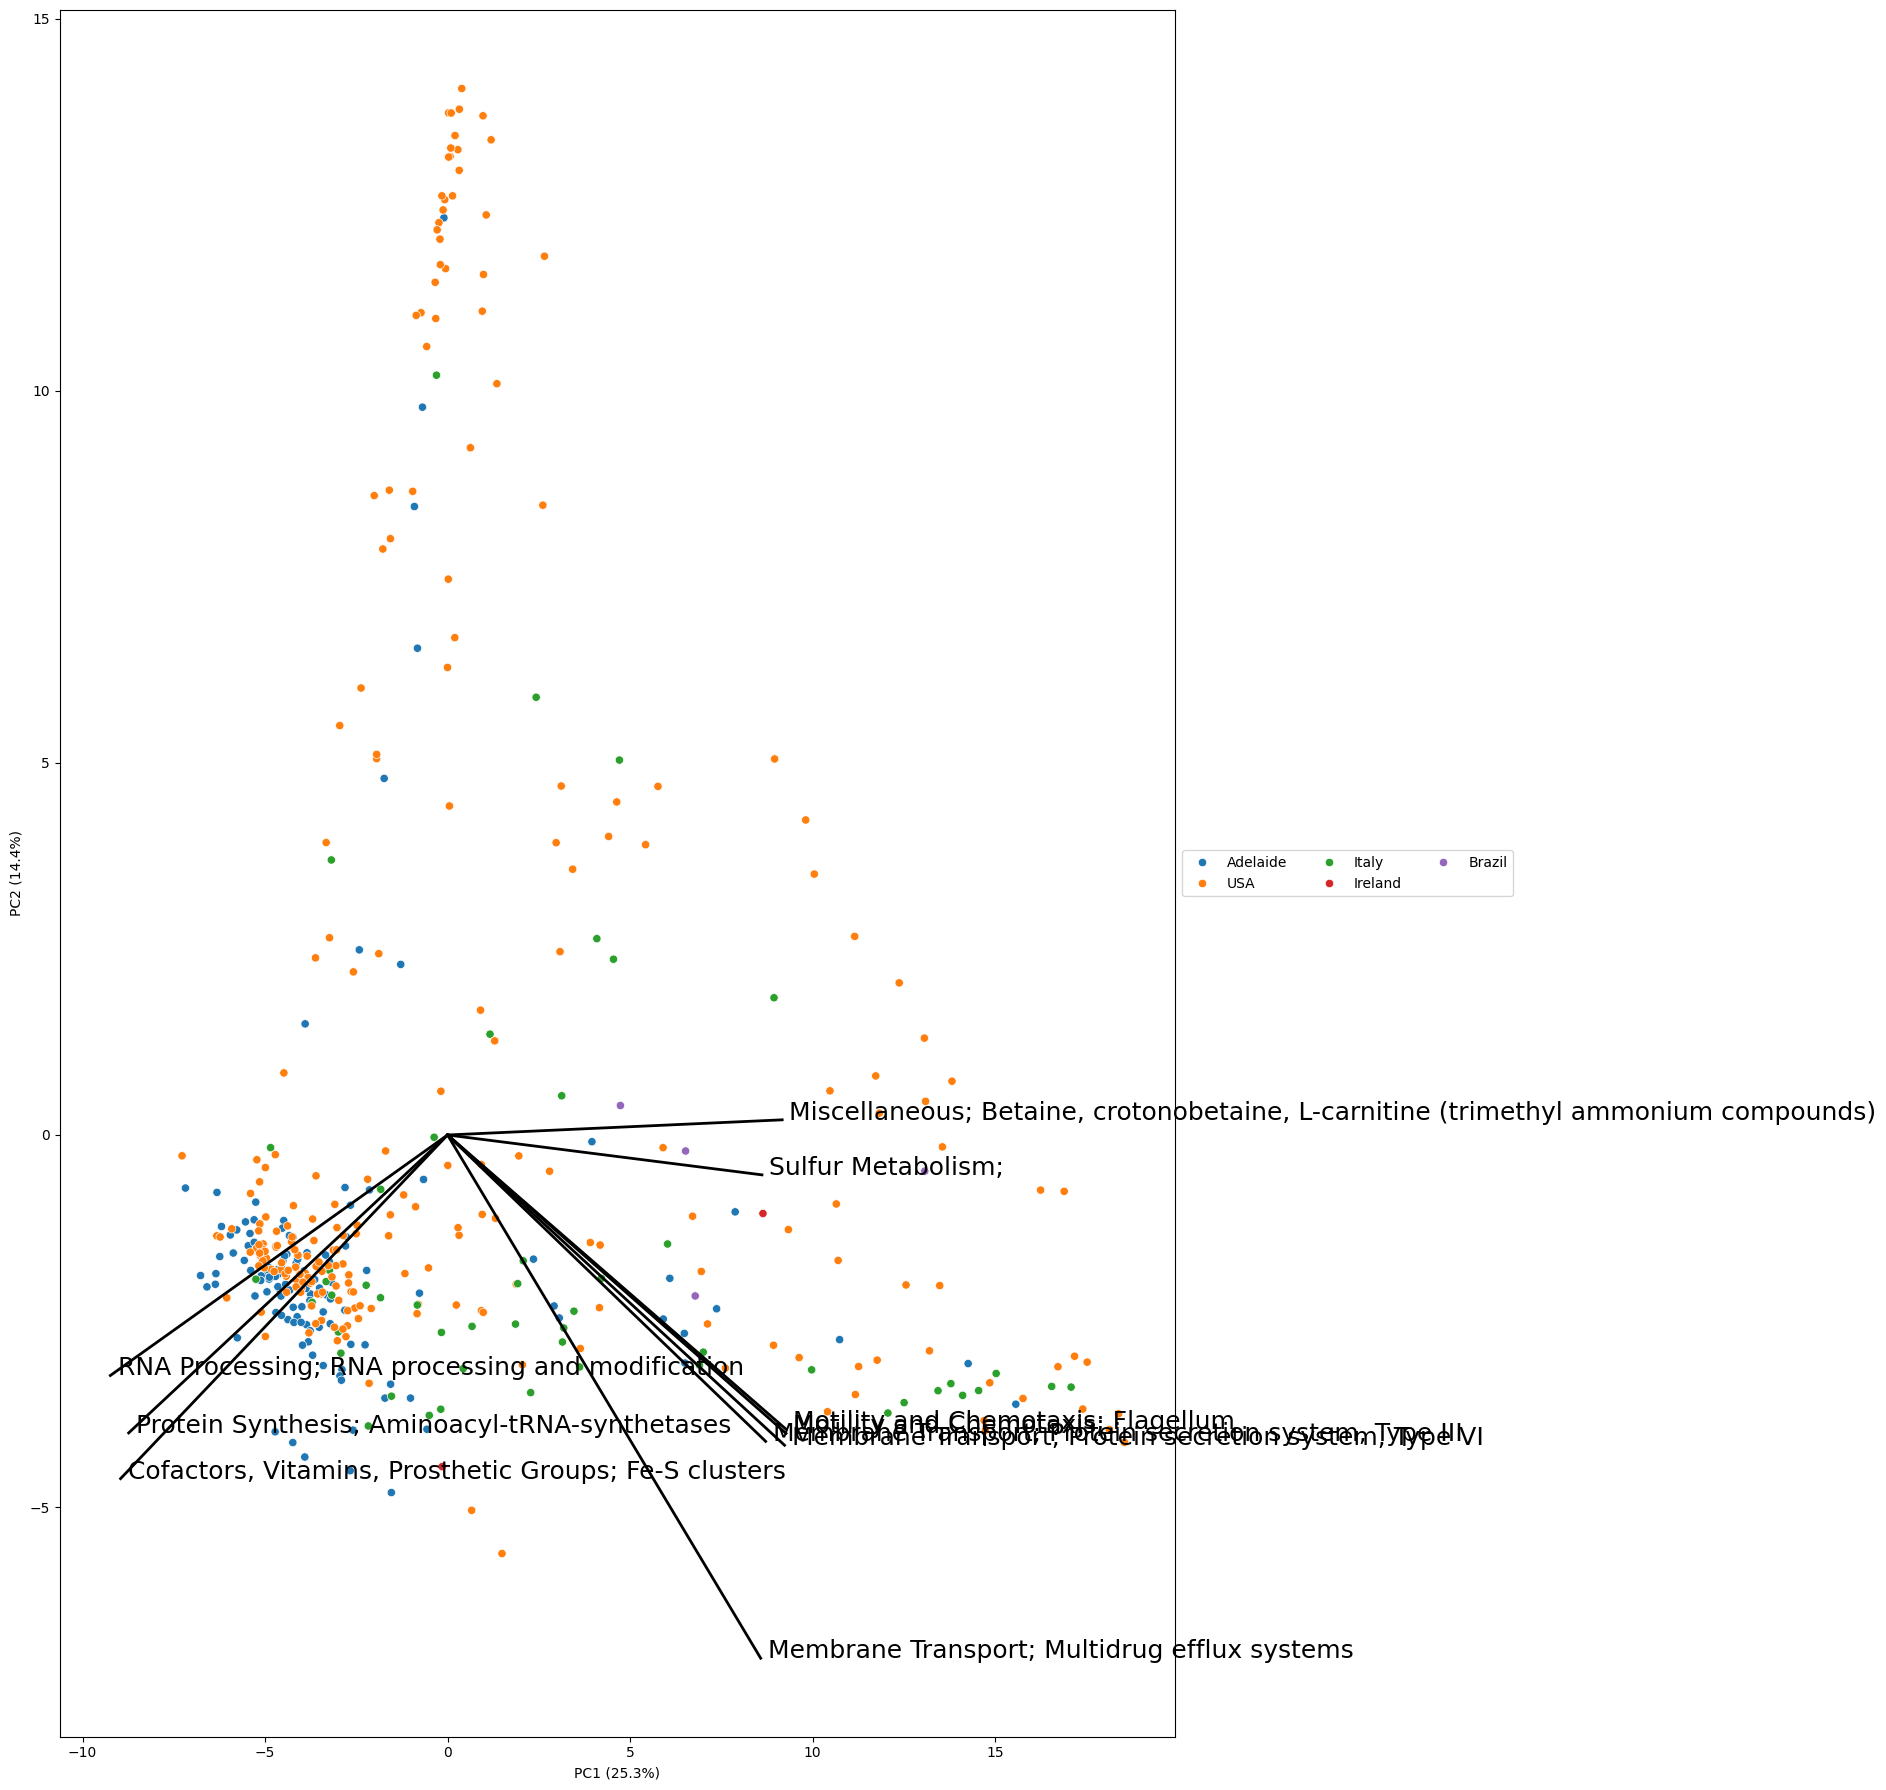

In [20]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.scatterplot(x="PC1", y="PC2", hue='Country', legend=True, data=pcloc, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)
l = ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
l = ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
# get the 5 largest loadings
ldf = loadings.loc[loadings.abs().nlargest(10, ['PC1', 'PC2']).index]
# get the maximum values for x and y for the loadings and the PCA
mlx = max(abs(ldf.PC1))
mly = max(abs(ldf.PC2))
mpx = max(abs(pct_df.PC1))
mpy = max(abs(pct_df.PC2))
print(f"For PC1, maximum for loading is {mlx} and maximum for PCA is {mpx}")
print(f"For PC2, maximum for loading is {mly} and maximum for PCA is {mpy}")

for i, l in ldf.iterrows():
    # scale the loadings to fit the figure
    ex = ( (l.PC1/mlx) * mpx ) / 2
    ey = ( (l.PC2/mly) * mpy ) / 2
    # add the text and the line
    plt.text(ex+0.2, ey, i, fontsize=18)
    plt.plot([0, ex ], [0, ey ], 'k-', lw=2)

plt.tight_layout()

# Taxonomy

We repeat the same analysis, but with genus taxonomy

### Read the Adelaide data

In [21]:
adl = pd.read_csv("Adelaide/CF_Taxonomy/genus.tsv.gz", compression='gzip', delimiter="\t")
adl = adl.rename(columns={"#NAME":"Accession"})
adl = adl.set_index("Accession")
adl = adl.reindex(natsorted(adl.columns), axis=1)
adl = adl.T
# normalise the data by the row sum before we add the label
adl = adl.div(adl.sum(axis=1), axis=0)
adl['geo_loc_name_country_calc'] = "Adelaide"
adl

Accession           g__Halothece  g__Dasypyrum   g__Geofilum  g__Triplophysa  \
623361_20180123_S            0.0           0.0  1.871224e-05             0.0   
634207_20180510_S            0.0           0.0  7.366511e-06             0.0   
634207_20180517_S            0.0           0.0  1.290154e-05             0.0   
639354_20171206_S            0.0           0.0  3.705914e-06             0.0   
642660_20180601_S            0.0           0.0  9.695324e-07             0.0   
...                          ...           ...           ...             ...   
1690154_20180406_S           0.0           0.0  4.824772e-06             0.0   
1723809_20180227_S           0.0           0.0  4.902915e-06             0.0   
1834617_20180501_S           0.0           0.0  5.850432e-06             0.0   
1845116_20180403_S           0.0           0.0  1.677878e-05             0.0   
1862551_20180123_S           0.0           0.0  5.179625e-05             0.0   

Accession           g__Luteirhabdus  g__Fonticella  g__Microvirgula  \
623361_20180123_S               0.0   0.000000e+00         0.000002   
634207_20180510_S               0.0   4.333242e-07         0.000005   
634207_20180517_S               0.0   0.000000e+00         0.000005   
639354_20171206_S               0.0   0.000000e+00         0.000000   
642660_20180601_S               0.0   0.000000e+00         0.000002   
...                             ...            ...              ...   
1690154_20180406_S              0.0   0.000000e+00         0.000006   
1723809_20180227_S              0.0   0.000000e+00         0.000002   
1834617_20180501_S              0.0   0.000000e+00         0.000007   
1845116_20180403_S              0.0   0.000000e+00         0.000000   
1862551_20180123_S              0.0   0.000000e+00         0.000000   

Accession           g__Rhodocytophaga  g__Allonocardiopsis  g__Desulforapulum  \
623361_20180123_S                 0.0         8.135756e-07           0.000000   
634207_20180510_S                 0.0         0.000000e+00           0.000003   
634207_20180517_S                 0.0         0.000000e+00           0.000000   
639354_20171206_S                 0.0         0.000000e+00           0.000015   
642660_20180601_S                 0.0         0.000000e+00           0.000002   
...                               ...                  ...                ...   
1690154_20180406_S                0.0         0.000000e+00           0.000000   
1723809_20180227_S                0.0         9.805830e-07           0.000001   
1834617_20180501_S                0.0         0.000000e+00           0.000001   
1845116_20180403_S                0.0         0.000000e+00           0.000002   
1862551_20180123_S                0.0         0.000000e+00           0.000000   

Accession           ...  g__Marivivens  g__Penicilliopsis  g__Rehaibacterium  \
623361_20180123_S   ...       0.000000                0.0                0.0   
634207_20180510_S   ...       0.000000                0.0                0.0   
634207_20180517_S   ...       0.000000                0.0                0.0   
639354_20171206_S   ...       0.000000                0.0                0.0   
642660_20180601_S   ...       0.000000                0.0                0.0   
...                 ...            ...                ...                ...   
1690154_20180406_S  ...       0.000000                0.0                0.0   
1723809_20180227_S  ...       0.000005                0.0                0.0   
1834617_20180501_S  ...       0.000000                0.0                0.0   
1845116_20180403_S  ...       0.000001                0.0                0.0   
1862551_20180123_S  ...       0.000013                0.0                0.0   

Accession           g__Halopiger  g__Budvicia  g__Biseptimavirus  \
623361_20180123_S            0.0     0.000006           0.000000   
634207_20180510_S            0.0     0.000000           0.000000   
634207_20180517_S            0.0     0.000000   

### Read the worldwide data

In [22]:
wlt = pd.read_csv("OtherSequences/mmseqs_taxonomy/genus.tsv.gz", compression='gzip', delimiter="\t")
wlt = wlt.rename(columns={"#NAME":"Accession"})
wlt = wlt.set_index('Accession')
wlt = wlt.reindex(natsorted(wlt.columns), axis=1)
wlt = wlt.T

# read the list of selected ids
srr_wanted = set()
with open("cf_sputum_sra_ids.txt", 'r') as f:
    for l in f:
        srr_wanted.add(l.strip())
wlt = wlt[wlt.index.isin(srr_wanted)]


# normalise the data by the row sum 
wlt = wlt.div(wlt.sum(axis=1), axis=0)
wlt

Accession      g__Morella  g__Neofusicoccum  g__Phoenicibacter  \
SRR1177122   0.000000e+00               0.0       0.000000e+00   
SRR1180012   0.000000e+00               0.0       0.000000e+00   
SRR1180013   0.000000e+00               0.0       0.000000e+00   
SRR3284698   0.000000e+00               0.0       0.000000e+00   
SRR3284701   0.000000e+00               0.0       0.000000e+00   
...                   ...               ...                ...   
SRR20794687  3.224296e-07               0.0       0.000000e+00   
SRR20794691  0.000000e+00               0.0       0.000000e+00   
SRR20794692  0.000000e+00               0.0       0.000000e+00   
SRR20794693  1.405274e-06               0.0       0.000000e+00   
SRR20794695  6.914883e-07               0.0       3.457442e-07   

Accession    g__Epsilonretrovirus  g__Suspvirus  g__Halopiger  g__Halosegnis  \
SRR1177122           0.000000e+00           0.0           0.0            0.0   
SRR1180012           0.000000e+00           0.0           0.0            0.0   
SRR1180013           0.000000e+00           0.0           0.0            0.0   
SRR3284698           1.594778e-06           0.0           0.0            0.0   
SRR3284701           7.643818e-06           0.0           0.0            0.0   
...                           ...           ...           ...            ...   
SRR20794687          1.612148e-07           0.0           0.0            0.0   
SRR20794691          0.000000e+00           0.0           0.0            0.0   
SRR20794692          0.000000e+00           0.0           0.0            0.0   
SRR20794693          2.810549e-07           0.0           0.0            0.0   
SRR20794695          6.914883e-07           0.0           0.0            0.0   

Accession      g__Lacerta    g__Dickeya  g__Exilisciurus  ...   g__Ruegeria  \
SRR1177122   0.000000e+00  0.000000e+00     0.000000e+00  ...  0.000000e+00   
SRR1180012   0.000000e+00  0.000000e+00     0.000000e+00  ...  0.000000e+00   
SRR1180013   0.000000e+00  0.000000e+00     0.000000e+00  ...  0.000000e+00   
SRR3284698   3.986945e-06  4.784334e-06     0.000000e+00  ...  0.000000e+00   
SRR3284701   5.095879e-06  8.493132e-07     0.000000e+00  ...  8.493132e-07   
...                   ...           ...              ...  ...           ...   
SRR20794687  3.224296e-07  6.448592e-07     0.000000e+00  ...  4.836444e-07   
SRR20794691  0.000000e+00  7.088678e-05     0.000000e+00  ...  1.346849e-05   
SRR20794692  0.000000e+00  9.743353e-05     0.000000e+00  ...  9.050591e-06   
SRR20794693  1.967384e-06  7.588482e-06     2.810549e-07  ...  8.431646e-06   
SRR20794695  4.148930e-06  1.037232e-06     0.000000e+00  ...  1.382977e-06   

Accession     g__Telluria  g__Votkovvirus  g__Python  g__Marinicella  \
SRR1177122   0.000000e+00             0.0   0.000000    0.000000e+00   
SRR1180012   0.000000e+00             0.0   0.000000    0.000000e+00   
SRR1180013   0.000000e+00             0.0   0.000000    0.000000e+00   
SRR3284698   0.000000e+00             0.0   0.000016    0.000000e+00   
SRR3284701   0.000000e+00             0.0   0.000011    8.493132e-07   
...                   ...             ...        ...             ...   
SRR20794687  0.000000e+00             0.0   0.000004    0.000000e+00   
SRR20794691  0.000000e+00             0.0   0.000000    0.000000e+00   
SRR20794692  5.586785e-08             0.0   0.000000    0.000000e+00   
SRR20794693  0.000000e+00             0.0   0.000010    2.810549e-07   
SRR20794695  0.000000e+00             0.0   0.000013    2.074465e-06   

Accession    g__Trifolium  g__Candidatus Ichthyocystis  g__Balaeniceps  \
SRR1177122   8.719047e-05                          0.0    0.000000e+00   
SRR1180012   3.929852e-05                          0.0    0.000000e+00   
SRR1180013   1.091203e-04                          0.0    0.000000e+00   
SRR3284698   4.624856e-04                          0.0    7.973890e-07   
SRR3284701   5.146838e-04                          0.0    0.00

In [23]:
six = pd.read_csv("OtherSequences/16S.tsv.gz", compression='gzip', delimiter="\t")
sr = six[six["Aligned 1 time"] > 1]
wlt = wlt[~wlt.index.isin(sr['Run'])]
wlt

Accession      g__Morella  g__Neofusicoccum  g__Phoenicibacter  \
SRR1177122   0.000000e+00               0.0       0.000000e+00   
SRR1180012   0.000000e+00               0.0       0.000000e+00   
SRR1180013   0.000000e+00               0.0       0.000000e+00   
SRR3284698   0.000000e+00               0.0       0.000000e+00   
SRR3284701   0.000000e+00               0.0       0.000000e+00   
...                   ...               ...                ...   
SRR20794687  3.224296e-07               0.0       0.000000e+00   
SRR20794691  0.000000e+00               0.0       0.000000e+00   
SRR20794692  0.000000e+00               0.0       0.000000e+00   
SRR20794693  1.405274e-06               0.0       0.000000e+00   
SRR20794695  6.914883e-07               0.0       3.457442e-07   

Accession    g__Epsilonretrovirus  g__Suspvirus  g__Halopiger  g__Halosegnis  \
SRR1177122           0.000000e+00           0.0           0.0            0.0   
SRR1180012           0.000000e+00           0.0           0.0            0.0   
SRR1180013           0.000000e+00           0.0           0.0            0.0   
SRR3284698           1.594778e-06           0.0           0.0            0.0   
SRR3284701           7.643818e-06           0.0           0.0            0.0   
...                           ...           ...           ...            ...   
SRR20794687          1.612148e-07           0.0           0.0            0.0   
SRR20794691          0.000000e+00           0.0           0.0            0.0   
SRR20794692          0.000000e+00           0.0           0.0            0.0   
SRR20794693          2.810549e-07           0.0           0.0            0.0   
SRR20794695          6.914883e-07           0.0           0.0            0.0   

Accession      g__Lacerta    g__Dickeya  g__Exilisciurus  ...   g__Ruegeria  \
SRR1177122   0.000000e+00  0.000000e+00     0.000000e+00  ...  0.000000e+00   
SRR1180012   0.000000e+00  0.000000e+00     0.000000e+00  ...  0.000000e+00   
SRR1180013   0.000000e+00  0.000000e+00     0.000000e+00  ...  0.000000e+00   
SRR3284698   3.986945e-06  4.784334e-06     0.000000e+00  ...  0.000000e+00   
SRR3284701   5.095879e-06  8.493132e-07     0.000000e+00  ...  8.493132e-07   
...                   ...           ...              ...  ...           ...   
SRR20794687  3.224296e-07  6.448592e-07     0.000000e+00  ...  4.836444e-07   
SRR20794691  0.000000e+00  7.088678e-05     0.000000e+00  ...  1.346849e-05   
SRR20794692  0.000000e+00  9.743353e-05     0.000000e+00  ...  9.050591e-06   
SRR20794693  1.967384e-06  7.588482e-06     2.810549e-07  ...  8.431646e-06   
SRR20794695  4.148930e-06  1.037232e-06     0.000000e+00  ...  1.382977e-06   

Accession     g__Telluria  g__Votkovvirus  g__Python  g__Marinicella  \
SRR1177122   0.000000e+00             0.0   0.000000    0.000000e+00   
SRR1180012   0.000000e+00             0.0   0.000000    0.000000e+00   
SRR1180013   0.000000e+00             0.0   0.000000    0.000000e+00   
SRR3284698   0.000000e+00             0.0   0.000016    0.000000e+00   
SRR3284701   0.000000e+00             0.0   0.000011    8.493132e-07   
...                   ...             ...        ...             ...   
SRR20794687  0.000000e+00             0.0   0.000004    0.000000e+00   
SRR20794691  0.000000e+00             0.0   0.000000    0.000000e+00   
SRR20794692  5.586785e-08             0.0   0.000000    0.000000e+00   
SRR20794693  0.000000e+00             0.0   0.000010    2.810549e-07   
SRR20794695  0.000000e+00             0.0   0.000013    2.074465e-06   

Accession    g__Trifolium  g__Candidatus Ichthyocystis  g__Balaeniceps  \
SRR1177122   8.719047e-05                          0.0    0.000000e+00   
SRR1180012   3.929852e-05                          0.0    0.000000e+00   
SRR1180013   1.091203e-04                          0.0    0.000000e+00   
SRR3284698   4.624856e-04                          0.0    7.973890e-07   
SRR3284701   5.146838e-04                          0.0    0.00

## Add the metadata

In [24]:
wmd = pd.read_csv("OtherSequences/bq-results-20230813-093918-1691921491006.tsv.gz", compression='gzip', delimiter="\t")
wma = wmd[['Accession', 'geo_loc_name_country_calc']]
wma = wma.set_index("Accession")
wldj = wlt.join(wma,  how='inner')
comb = pd.concat([adl, wldj], axis=0)
comb

g__Halothece  g__Dasypyrum   g__Geofilum  g__Triplophysa  \
623361_20180123_S           0.0           0.0  1.871224e-05    0.000000e+00   
634207_20180510_S           0.0           0.0  7.366511e-06    0.000000e+00   
634207_20180517_S           0.0           0.0  1.290154e-05    0.000000e+00   
639354_20171206_S           0.0           0.0  3.705914e-06    0.000000e+00   
642660_20180601_S           0.0           0.0  9.695324e-07    0.000000e+00   
...                         ...           ...           ...             ...   
SRR20794687                 0.0           0.0  1.773363e-06    3.466118e-05   
SRR20794691                 0.0           0.0  0.000000e+00    0.000000e+00   
SRR20794692                 0.0           0.0  2.234714e-07    1.117357e-07   
SRR20794693                 0.0           0.0  3.091604e-06    1.082061e-04   
SRR20794695                 0.0           0.0  3.457442e-07    9.473390e-05   

                   g__Luteirhabdus  g__Fonticella  g__Microvirgula  \
623361_20180123_S     0.000000e+00   0.000000e+00         0.000002   
634207_20180510_S     0.000000e+00   4.333242e-07         0.000005   
634207_20180517_S     0.000000e+00   0.000000e+00         0.000005   
639354_20171206_S     0.000000e+00   0.000000e+00         0.000000   
642660_20180601_S     0.000000e+00   0.000000e+00         0.000002   
...                            ...            ...              ...   
SRR20794687           3.224296e-07   1.612148e-07         0.000000   
SRR20794691           0.000000e+00   0.000000e+00         0.000019   
SRR20794692           5.586785e-08   5.586785e-08         0.000014   
SRR20794693           0.000000e+00   1.967384e-06         0.000015   
SRR20794695           0.000000e+00   6.914883e-07         0.000000   

                   g__Rhodocytophaga  g__Allonocardiopsis  g__Desulforapulum  \
623361_20180123_S       0.000000e+00         8.135756e-07           0.000000   
634207_20180510_S       0.000000e+00         0.000000e+00           0.000003   
634207_20180517_S       0.000000e+00         0.000000e+00           0.000000   
639354_20171206_S       0.000000e+00         0.000000e+00           0.000015   
642660_20180601_S       0.000000e+00         0.000000e+00           0.000002   
...                              ...                  ...                ...   
SRR20794687             3.224296e-07         0.000000e+00           0.000000   
SRR20794691             0.000000e+00         0.000000e+00           0.000000   
SRR20794692             1.676035e-07         0.000000e+00           0.000000   
SRR20794693             8.431646e-07         0.000000e+00           0.000000   
SRR20794695             3.457442e-07         0.000000e+00           0.000000   

                   ...  g__Esteya  g__Sripuvirus  g__Scapholeberis  \
623361_20180123_S  ...        NaN            NaN               NaN   
634207_20180510_S  ...        NaN            NaN               NaN   
634207_20180517_S  ...        NaN            NaN               NaN   
639354_20171206_S  ...        NaN            NaN               NaN   
642660_20180601_S  ...        NaN            NaN               NaN   
...                ...        ...            ...               ...   
SRR20794687        ...        0.0            0.0               0.0   
SRR20794691        ...        0.0            0.0               0.0   
SRR20794692        ...        0.0            0.0               0.0   
SRR20794693        ...        0.0            0.0               0.0   
SRR20794695        ...        0.0            0.0               0.0   

                   g__Hippolais  g__Sphaerimonospora   g__Telluria  \
623361_20180123_S           NaN                  NaN           NaN   
634207_20180510_S           NaN                  NaN           NaN   
634207_20180517_S           NaN                  NaN           NaN   
639354_20171206_S           NaN                  NaN           NaN   
642660_20180601_S           NaN                  NaN           NaN   
...    

## Reset the metadata

In [25]:
locs = comb[['geo_loc_name_country_calc']]
locs = locs.rename(columns={"geo_loc_name_country_calc": "Country"})
df = comb.drop(['geo_loc_name_country_calc'], axis=1)
df = df.dropna(axis=1)
df

g__Halothece  g__Dasypyrum   g__Geofilum  g__Triplophysa  \
623361_20180123_S           0.0           0.0  1.871224e-05    0.000000e+00   
634207_20180510_S           0.0           0.0  7.366511e-06    0.000000e+00   
634207_20180517_S           0.0           0.0  1.290154e-05    0.000000e+00   
639354_20171206_S           0.0           0.0  3.705914e-06    0.000000e+00   
642660_20180601_S           0.0           0.0  9.695324e-07    0.000000e+00   
...                         ...           ...           ...             ...   
SRR20794687                 0.0           0.0  1.773363e-06    3.466118e-05   
SRR20794691                 0.0           0.0  0.000000e+00    0.000000e+00   
SRR20794692                 0.0           0.0  2.234714e-07    1.117357e-07   
SRR20794693                 0.0           0.0  3.091604e-06    1.082061e-04   
SRR20794695                 0.0           0.0  3.457442e-07    9.473390e-05   

                   g__Luteirhabdus  g__Fonticella  g__Microvirgula  \
623361_20180123_S     0.000000e+00   0.000000e+00         0.000002   
634207_20180510_S     0.000000e+00   4.333242e-07         0.000005   
634207_20180517_S     0.000000e+00   0.000000e+00         0.000005   
639354_20171206_S     0.000000e+00   0.000000e+00         0.000000   
642660_20180601_S     0.000000e+00   0.000000e+00         0.000002   
...                            ...            ...              ...   
SRR20794687           3.224296e-07   1.612148e-07         0.000000   
SRR20794691           0.000000e+00   0.000000e+00         0.000019   
SRR20794692           5.586785e-08   5.586785e-08         0.000014   
SRR20794693           0.000000e+00   1.967384e-06         0.000015   
SRR20794695           0.000000e+00   6.914883e-07         0.000000   

                   g__Rhodocytophaga  g__Allonocardiopsis  g__Desulforapulum  \
623361_20180123_S       0.000000e+00         8.135756e-07           0.000000   
634207_20180510_S       0.000000e+00         0.000000e+00           0.000003   
634207_20180517_S       0.000000e+00         0.000000e+00           0.000000   
639354_20171206_S       0.000000e+00         0.000000e+00           0.000015   
642660_20180601_S       0.000000e+00         0.000000e+00           0.000002   
...                              ...                  ...                ...   
SRR20794687             3.224296e-07         0.000000e+00           0.000000   
SRR20794691             0.000000e+00         0.000000e+00           0.000000   
SRR20794692             1.676035e-07         0.000000e+00           0.000000   
SRR20794693             8.431646e-07         0.000000e+00           0.000000   
SRR20794695             3.457442e-07         0.000000e+00           0.000000   

                   ...  g__Mangrovicoccus  g__Marivivens  g__Penicilliopsis  \
623361_20180123_S  ...       0.000000e+00            0.0       0.000000e+00   
634207_20180510_S  ...       8.666484e-07            0.0       0.000000e+00   
634207_20180517_S  ...       7.589142e-07            0.0       0.000000e+00   
639354_20171206_S  ...       0.000000e+00            0.0       0.000000e+00   
642660_20180601_S  ...       0.000000e+00            0.0       0.000000e+00   
...                ...                ...            ...                ...   
SRR20794687        ...       0.000000e+00            0.0       1.612148e-07   
SRR20794691        ...       1.181446e-06            0.0       0.000000e+00   
SRR20794692        ...       6.145463e-07            0.0       0.000000e+00   
SRR20794693        ...       7.307427e-06            0.0       2.810549e-07   
SRR20794695        ...       6.914883e-07            0.0       1.037232e-06   

                   g__Rehaibacterium  g__Halopiger   g__Budvicia  \
623361_20180123_S       0.000000e+00           0.0  5.695030e-06   
634207_20180510_S       0.000000e+00           0.0  0.000000e+00   
634207_20180517_S       0.000000e+00           0.0  0.000000e+00   
639354_20171206_S       0.000000e+00           

## Start the PCA

In [26]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
pca = PCA(n_components=4)
pca.fit(df_scaled)
dft_pca = pca.transform(df_scaled)
zipped = list(zip(dft_pca[:,0],
                  dft_pca[:,1],
                  dft_pca[:,2],
                  dft_pca[:,3],
                  list(df.index),
                 ))
pct_df = pd.DataFrame(zipped, columns=['PC1', 'PC2', 'PC3', 'PC4', "Accession"])
pcloc = pct_df.set_index("Accession").join(locs, how="inner")
pcloc = pcloc[pcloc['Country'] != 'uncalculated']
pcloc

PC1       PC2        PC3        PC4   Country
623361_20180123_S  -8.056968 -0.625412  -5.914241  -3.950505  Adelaide
634207_20180510_S -13.521673  4.062272 -11.971252 -17.762009  Adelaide
634207_20180517_S -10.873684 -0.066291 -10.312071 -10.553102  Adelaide
639354_20171206_S  -6.304002 -2.747366  -2.010985  -0.121196  Adelaide
642660_20180601_S  -3.803601  1.057283  -4.294597   2.290851  Adelaide
...                      ...       ...        ...        ...       ...
SRR20794687        14.754696  5.370973   2.461921   2.968550       USA
SRR20794691        -2.746145 -6.940211   6.040608   7.382377       USA
SRR20794692        -2.504005 -6.041397   4.787130   8.071057       USA
SRR20794693        61.050385  4.666286  12.368069  -4.572918       USA
SRR20794695        72.461716  7.141362   3.638215  -6.719124       USA

[457 rows x 5 columns]

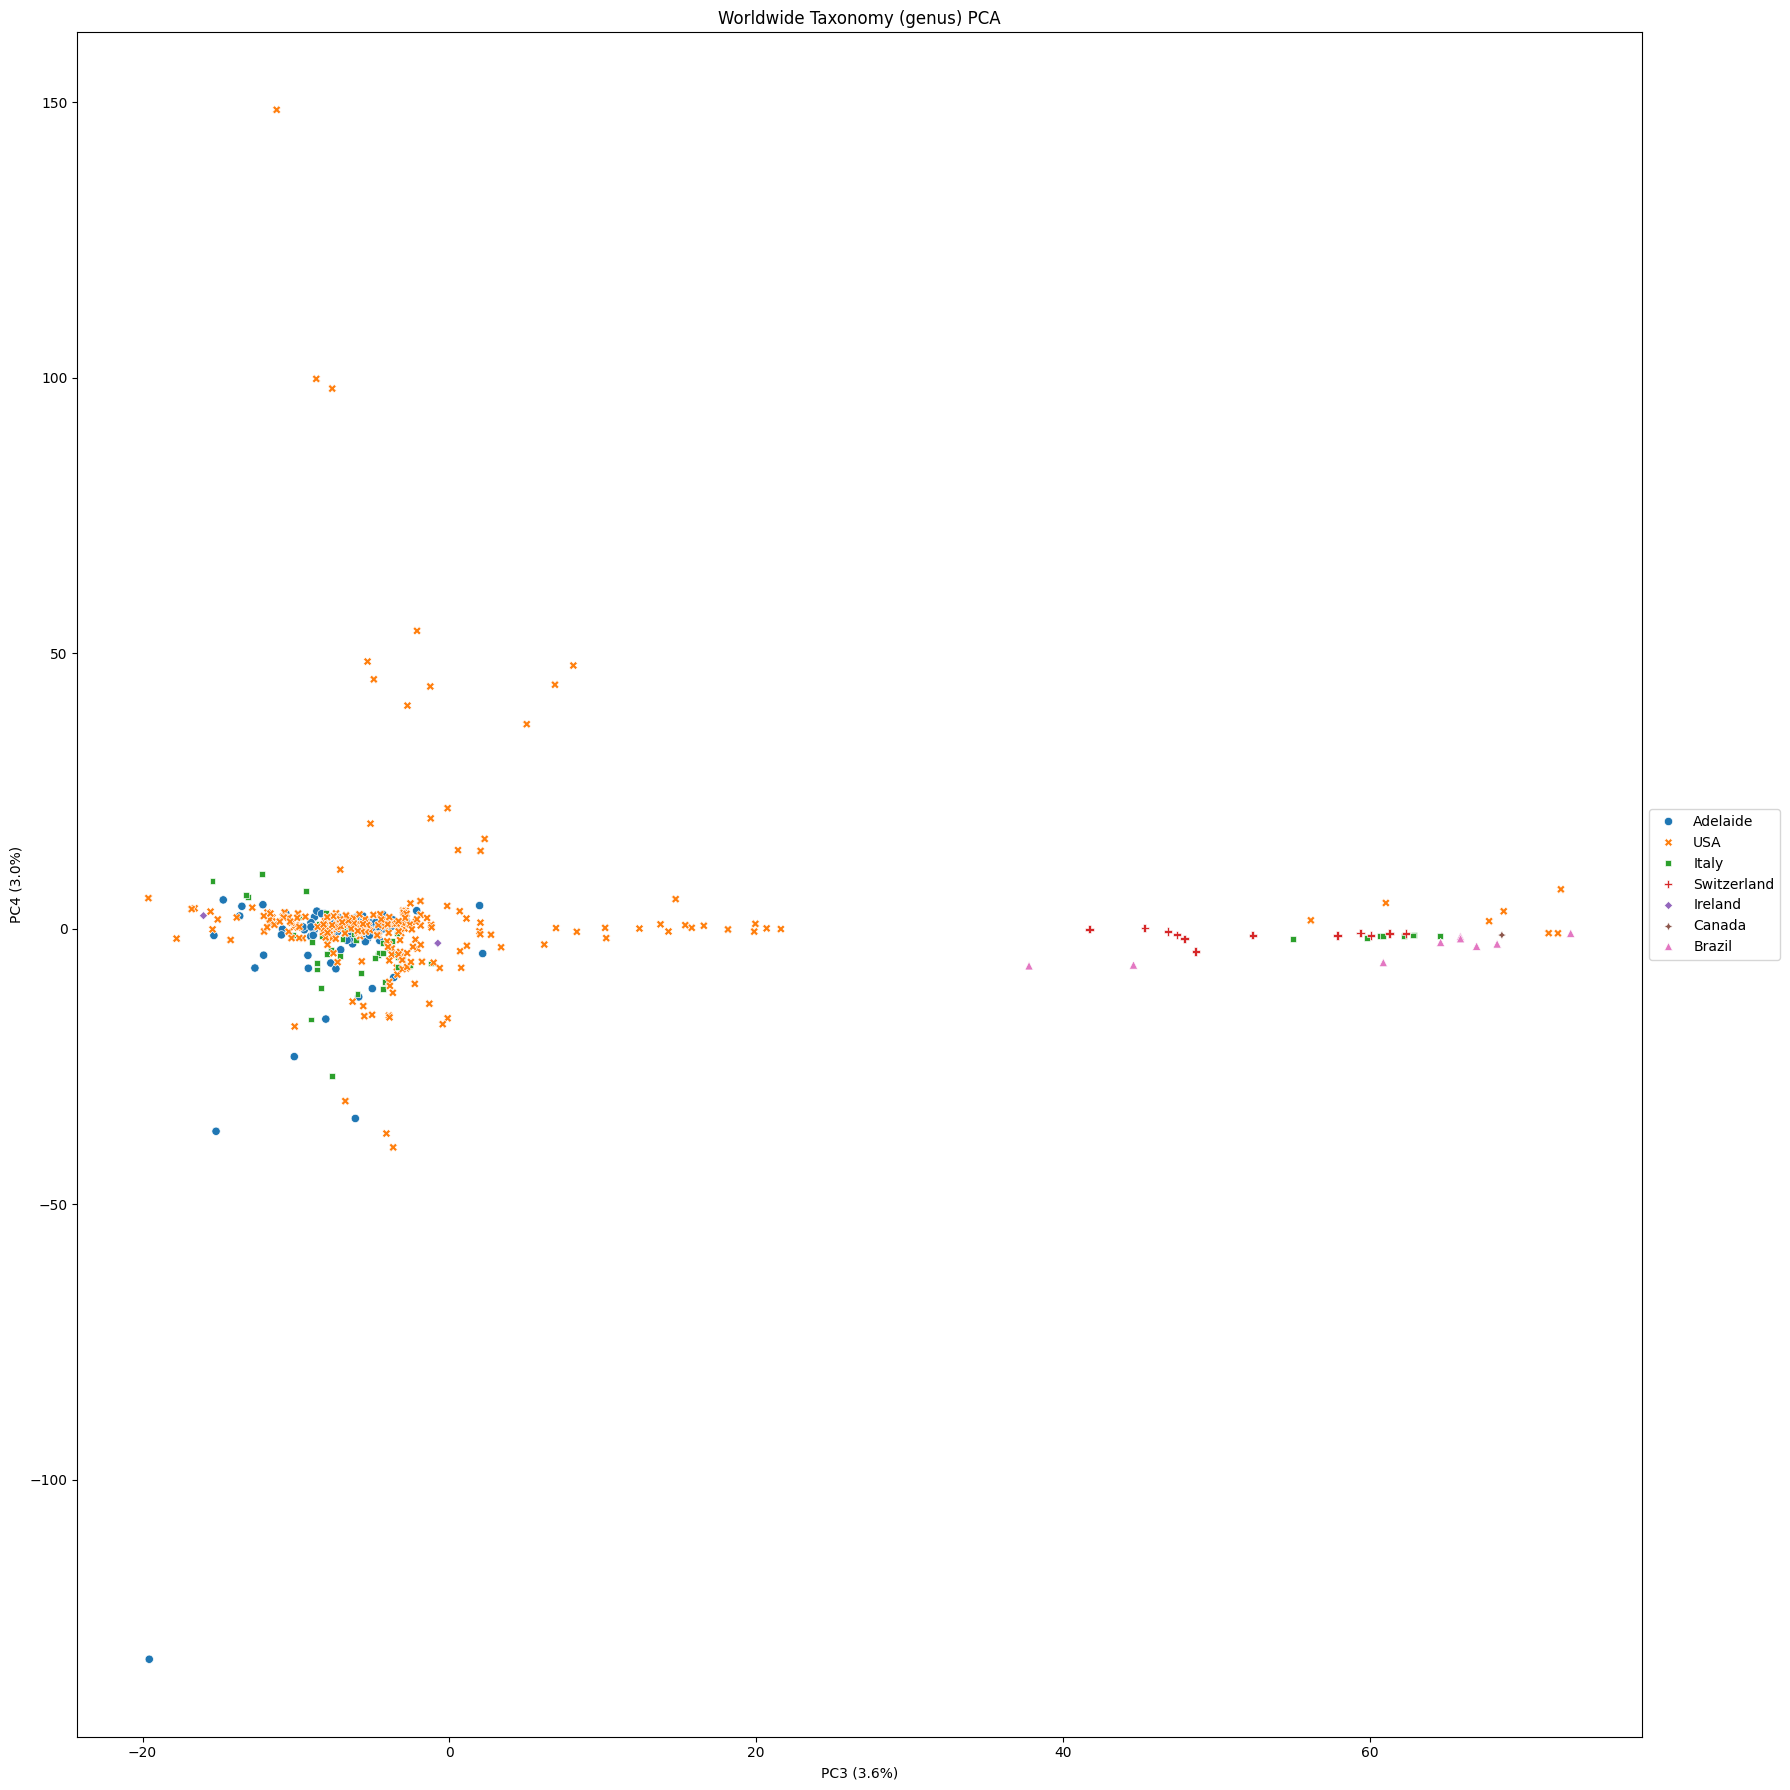

In [27]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.scatterplot(x="PC1", y="PC2", hue='Country', style='Country', legend=True, data=pcloc, ax=ax)
l = ax.set_xlabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)")
l = ax.set_ylabel(f"PC4 ({pca.explained_variance_ratio_[3]*100:.1f}%)")
t = ax.set_title(f"Worldwide Taxonomy (genus) PCA")
ax.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()


In [28]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=df.columns)
loadings.head(3)

PC1       PC2       PC3       PC4
g__Halothece  0.000769 -0.000652 -0.000279  0.001512
g__Dasypyrum -0.000711 -0.001125  0.000772 -0.002541
g__Geofilum  -0.009333  0.016749  0.006328 -0.018031

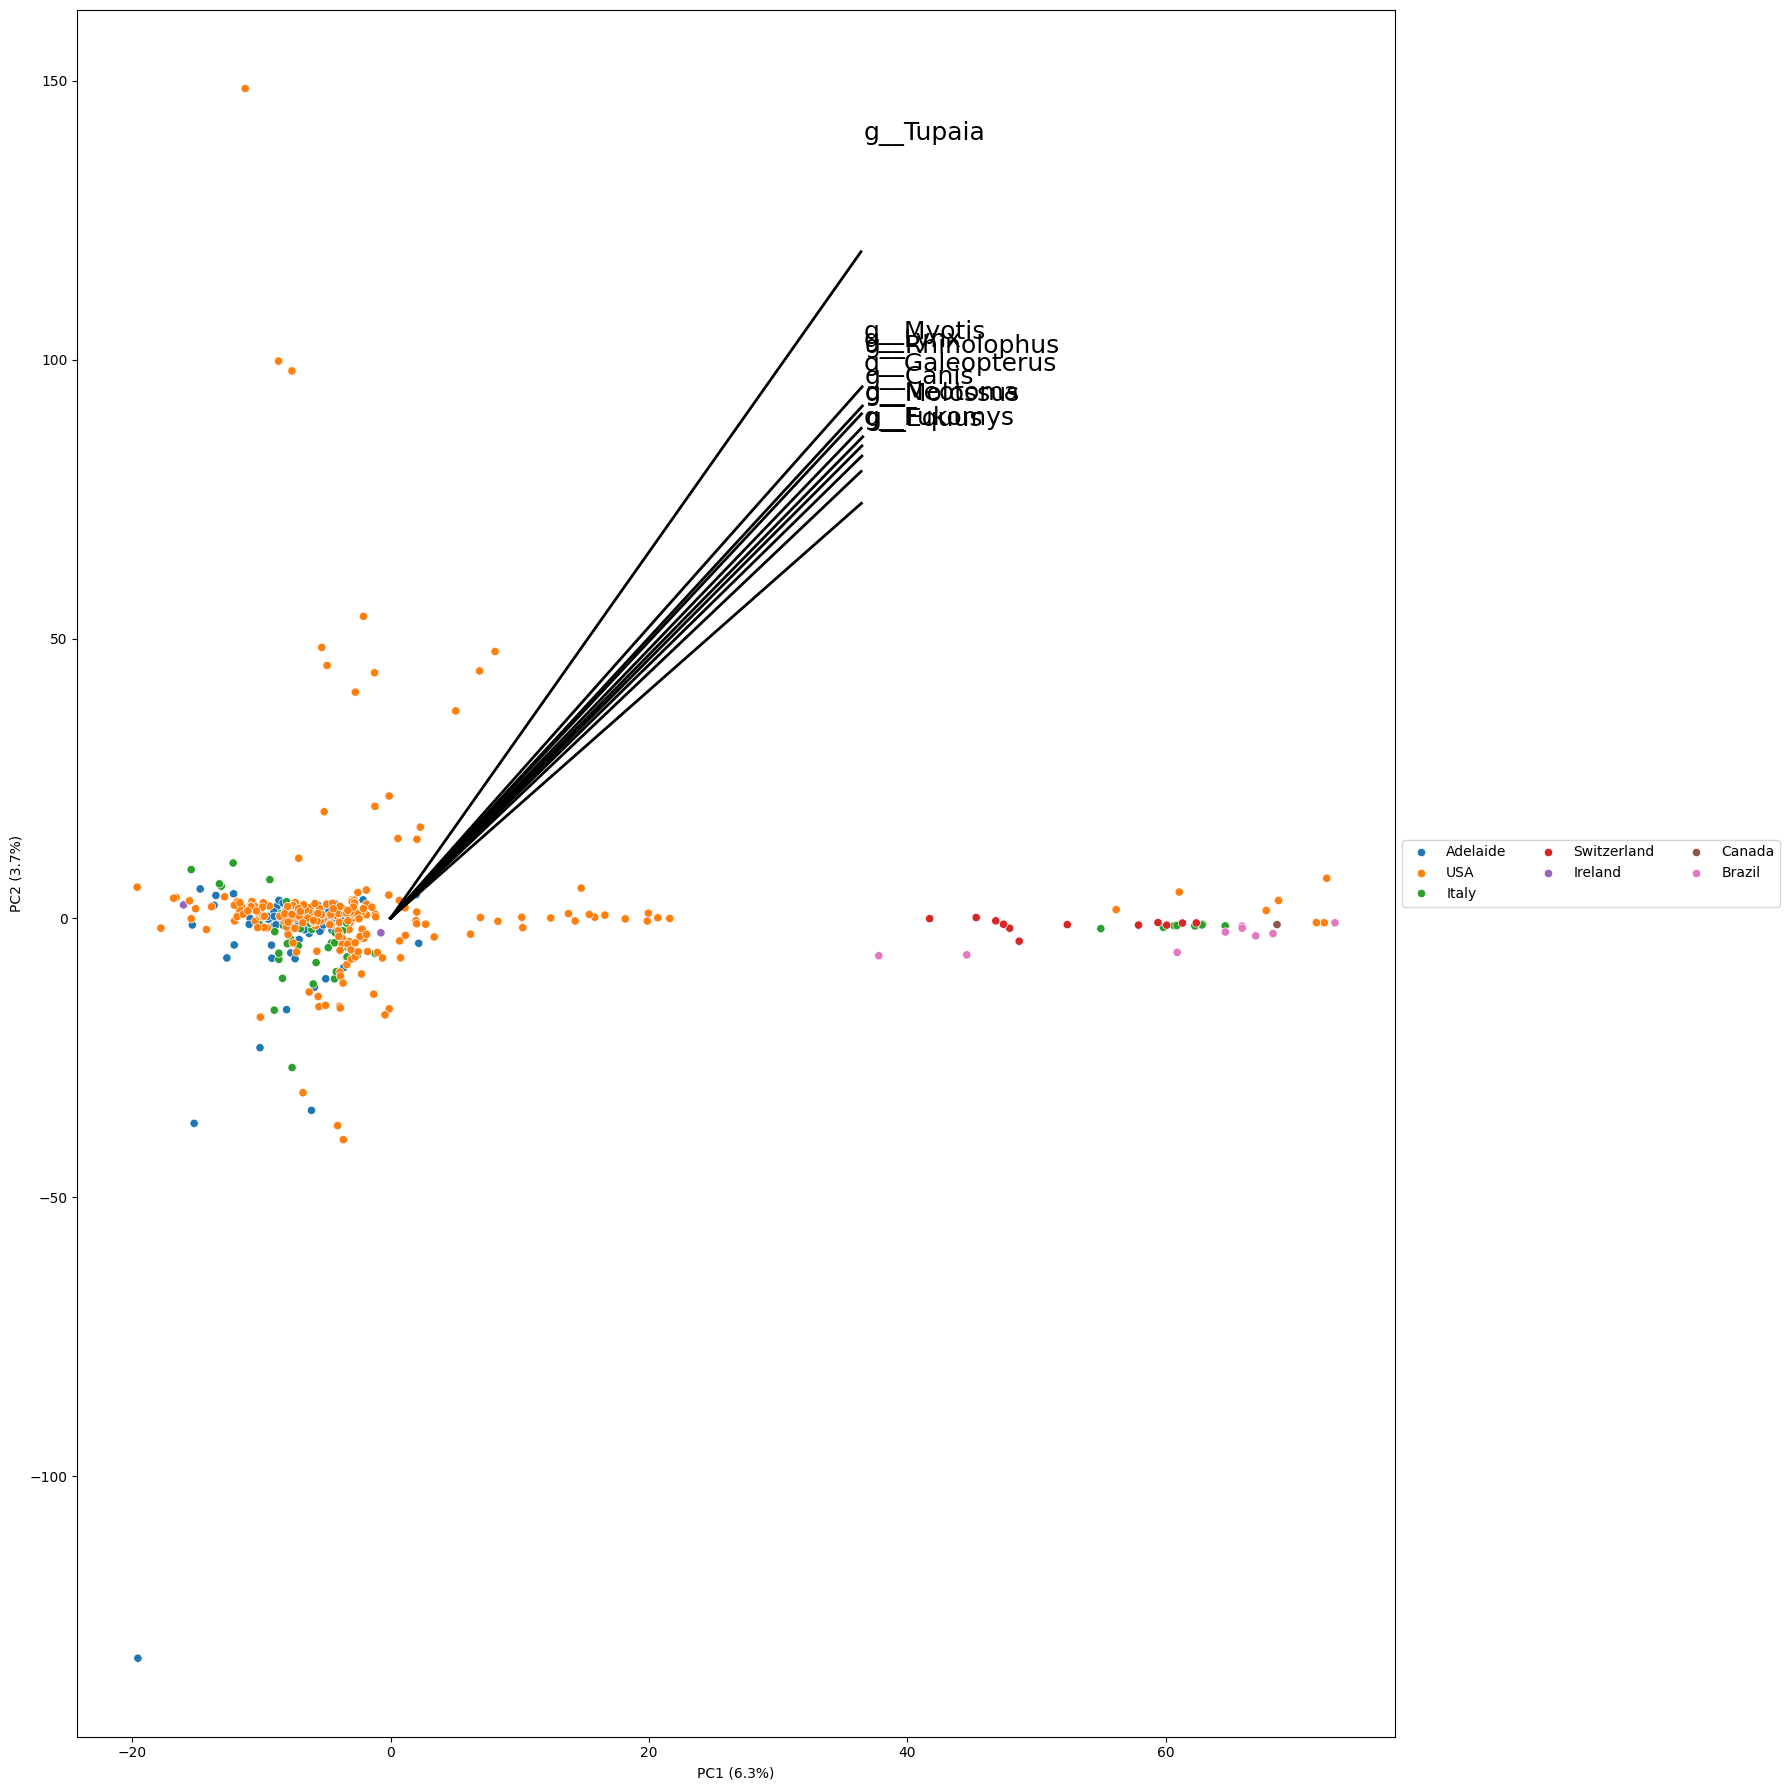

In [29]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.scatterplot(x="PC1", y="PC2", hue='Country', legend=True, data=pcloc, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)
l = ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
l = ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
# get the 5 largest loadings
ldf = loadings.loc[loadings.abs().nlargest(10, ['PC1', 'PC2']).index]
# get the maximum values for x and y for the loadings and the PCA
mlx = max(ldf.PC1)
mly = max(ldf.PC2)
mpx = max(pct_df.PC1)
mpy = max(pct_df.PC2)

c = 0
for i, l in ldf.iterrows():
    c+=2
    # scale the loadings to fit the figure
    ex = ( l.PC1 * (mpx/mlx) ) / 2
    ey = ( l.PC2 * (mpy/mly) ) / 2
    # add the text and the line
    plt.text(ex+0.2, ey+c, i, fontsize=18)
    plt.plot([0, ex ], [0, ey ], 'k-', lw=2)

plt.tight_layout()
fig.savefig("Worldwide_taxonomy_genus.png")

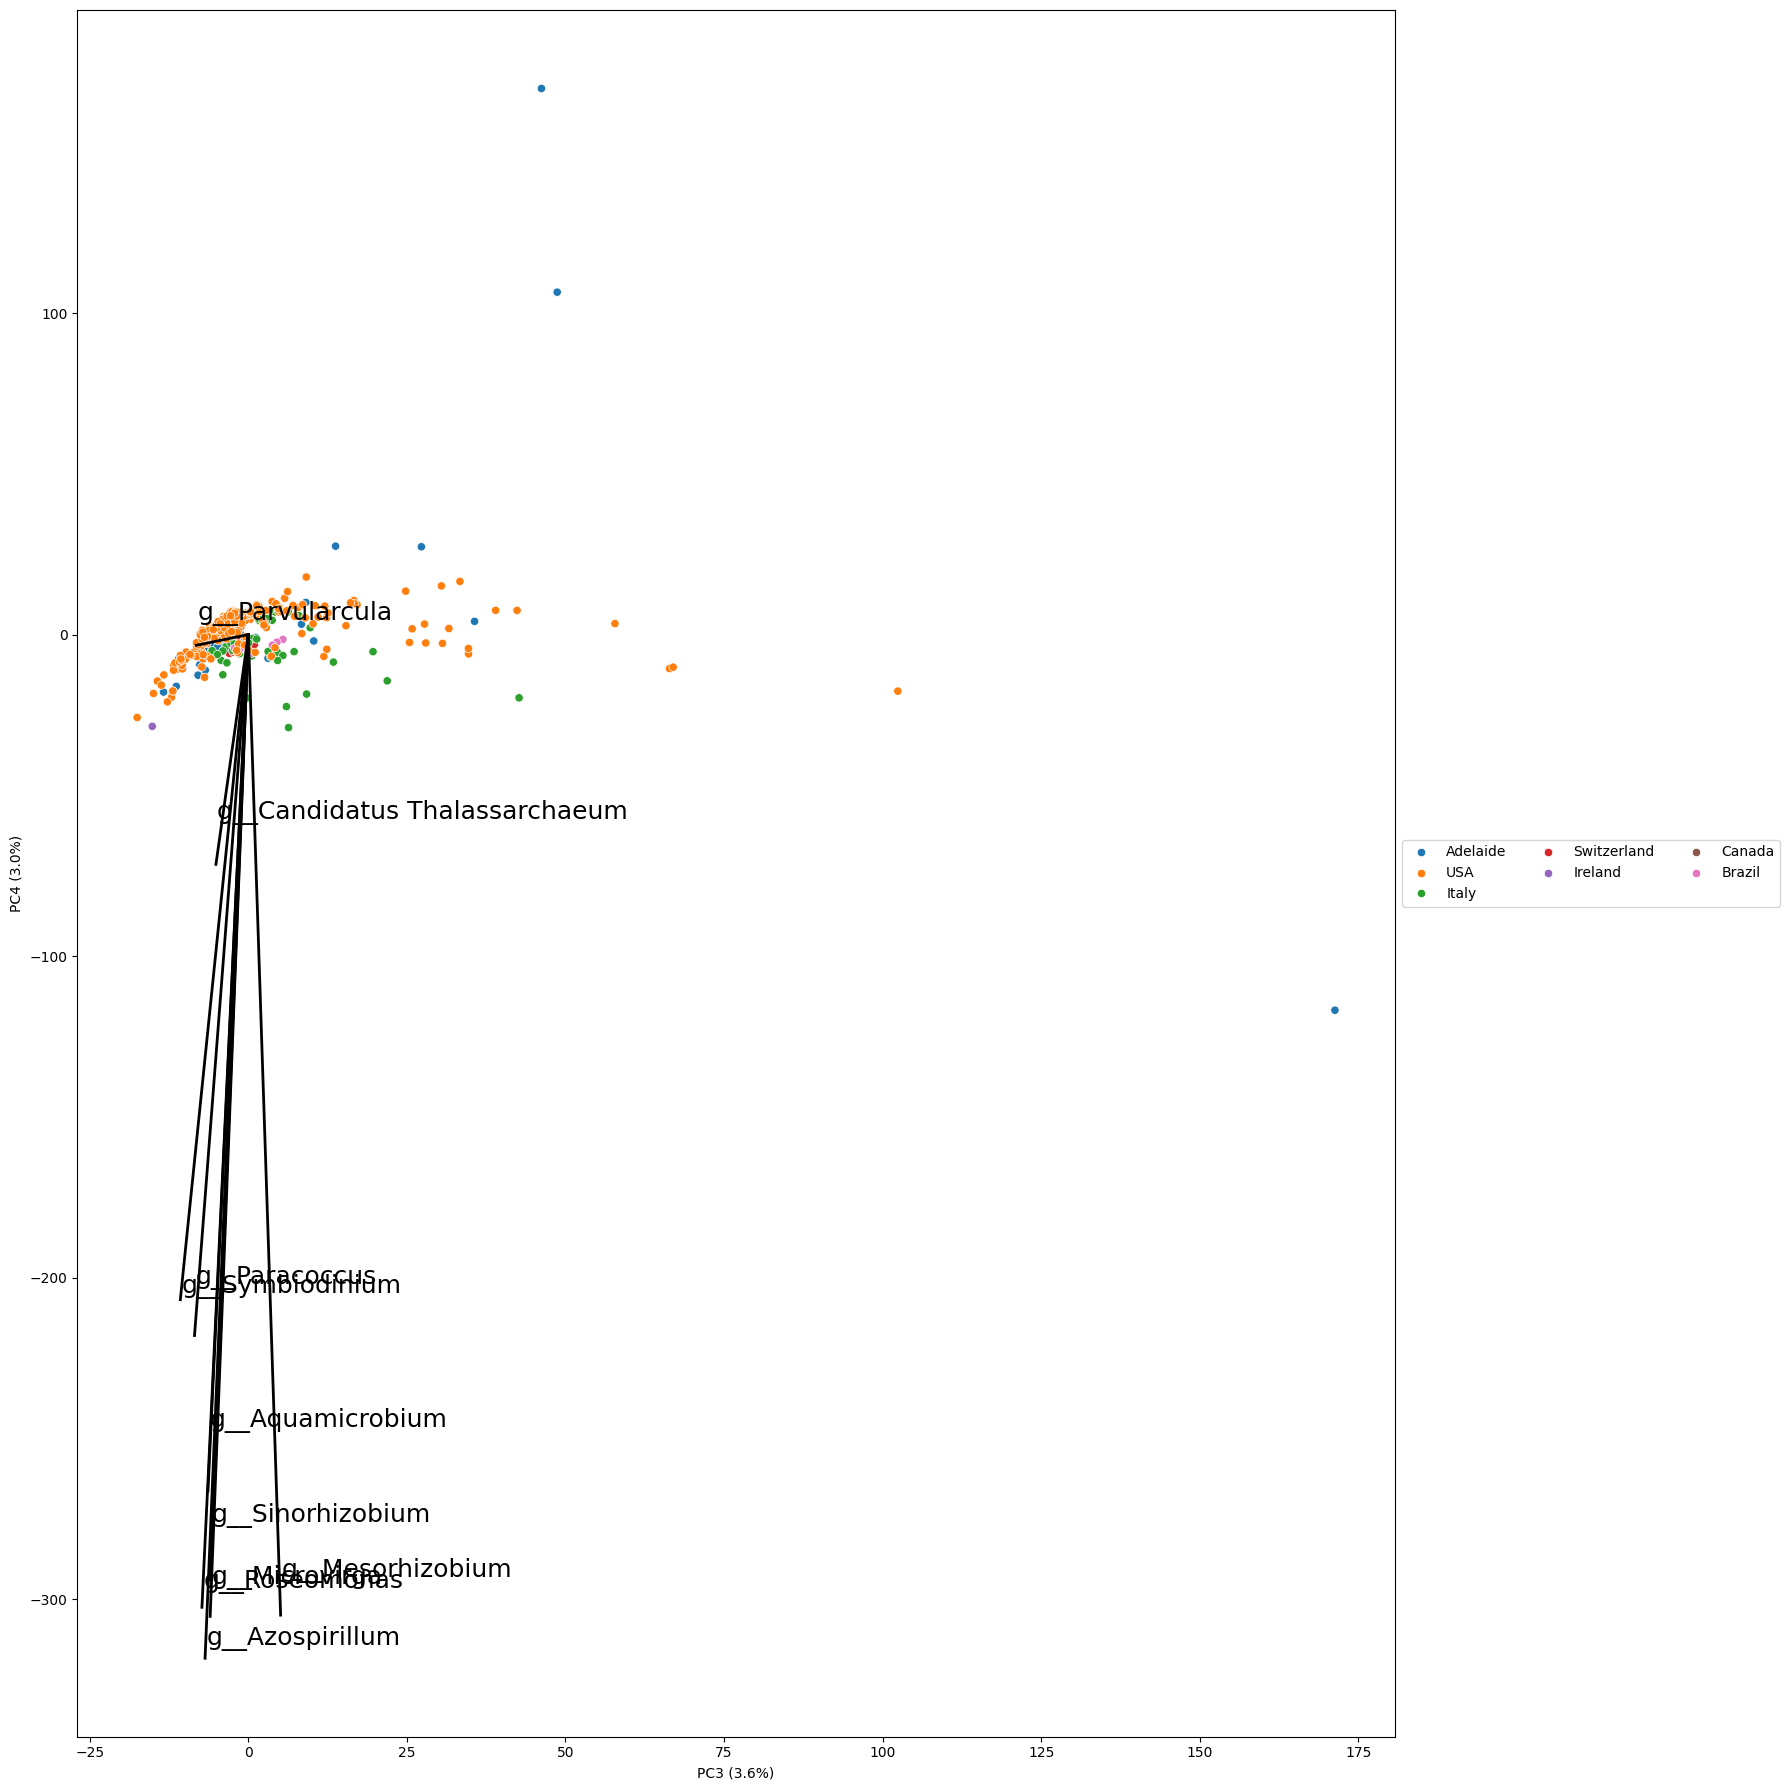

In [30]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.scatterplot(x="PC3", y="PC4", hue='Country', legend=True, data=pcloc, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)
l = ax.set_xlabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)")
l = ax.set_ylabel(f"PC4 ({pca.explained_variance_ratio_[3]*100:.1f}%)")
# get the 5 largest loadings
ldf = loadings.loc[loadings.abs().nlargest(10, ['PC3', 'PC4']).index]
# get the maximum values for x and y for the loadings and the PCA
mlx = max(ldf.PC3)
mly = max(ldf.PC4)
mpx = max(pct_df.PC3)
mpy = max(pct_df.PC4)

c = 0
for i, l in ldf.iterrows():
    c+=2
    # scale the loadings to fit the figure
    ex = ( l.PC1 * (mpx/mlx) ) / 2
    ey = ( l.PC2 * (mpy/mly) ) / 2
    # add the text and the line
    plt.text(ex+0.2, ey+c, i, fontsize=18)
    plt.plot([0, ex ], [0, ey ], 'k-', lw=2)

plt.tight_layout()

## Remove the eukaryotes from the data

Some of the samples have matches to eukaryotes, and so we're just going to remove them all. This means we need a table of all the taxonomy (`all_taxa.tsv`) and then we can filter just for the Bacteria/Viruses

In [31]:
taxon = pd.read_csv("OtherSequences/all_taxa.tsv.gz", compression='gzip', delimiter="\t")
taxon[taxon['Superkingdom'] == 's__Eukaryota']['Genus']

106809         g__Cafeteria
106810         g__Cafeteria
106811      g__Blastocystis
106812      g__Blastocystis
106813      g__Blastocystis
                ...        
112426         g__Coemansia
112427         g__Linderina
112428     g__Piptocephalis
112429       g__Syncephalis
112430    g__Thamnocephalis
Name: Genus, Length: 5622, dtype: object

### Read the Adelaide data without the Eukaryotes

In [32]:
adl = pd.read_csv("Adelaide/CF_Taxonomy/genus.tsv.gz", compression='gzip', delimiter="\t")
adl = adl.rename(columns={"#NAME":"Accession"})
adl = adl.set_index("Accession")
adl = adl[~adl.index.isin(taxon[taxon['Superkingdom'] == 's__Eukaryota']['Genus'])]
adl = adl.reindex(natsorted(adl.columns), axis=1)
adl = adl.T
# normalise the data by the row sum before we add the label
adl = adl.div(adl.sum(axis=1), axis=0)
adl['geo_loc_name_country_calc'] = "Adelaide"
adl

Accession           g__Halothece   g__Geofilum  g__Luteirhabdus  \
623361_20180123_S            0.0  1.880829e-05              0.0   
634207_20180510_S            0.0  7.398355e-06              0.0   
634207_20180517_S            0.0  1.295082e-05              0.0   
639354_20171206_S            0.0  3.767159e-06              0.0   
642660_20180601_S            0.0  9.752568e-07              0.0   
...                          ...           ...              ...   
1690154_20180406_S           0.0  4.845012e-06              0.0   
1723809_20180227_S           0.0  4.937635e-06              0.0   
1834617_20180501_S           0.0  5.875234e-06              0.0   
1845116_20180403_S           0.0  1.688673e-05              0.0   
1862551_20180123_S           0.0  5.224319e-05              0.0   

Accession           g__Fonticella  g__Microvirgula  g__Rhodocytophaga  \
623361_20180123_S    0.000000e+00         0.000002                0.0   
634207_20180510_S    4.351974e-07         0.000005                0.0   
634207_20180517_S    0.000000e+00         0.000005                0.0   
639354_20171206_S    0.000000e+00         0.000000                0.0   
642660_20180601_S    0.000000e+00         0.000002                0.0   
...                           ...              ...                ...   
1690154_20180406_S   0.000000e+00         0.000006                0.0   
1723809_20180227_S   0.000000e+00         0.000002                0.0   
1834617_20180501_S   0.000000e+00         0.000007                0.0   
1845116_20180403_S   0.000000e+00         0.000000                0.0   
1862551_20180123_S   0.000000e+00         0.000000                0.0   

Accession           g__Allonocardiopsis  g__Desulforapulum  g__Gottfriedia  \
623361_20180123_S          8.177518e-07           0.000000        0.000017   
634207_20180510_S          0.000000e+00           0.000003        0.000002   
634207_20180517_S          0.000000e+00           0.000000        0.000000   
639354_20171206_S          0.000000e+00           0.000015        0.000011   
642660_20180601_S          0.000000e+00           0.000002        0.000000   
...                                 ...                ...             ...   
1690154_20180406_S         0.000000e+00           0.000000        0.000003   
1723809_20180227_S         9.875270e-07           0.000001        0.000036   
1834617_20180501_S         0.000000e+00           0.000001        0.000024   
1845116_20180403_S         0.000000e+00           0.000002        0.000055   
1862551_20180123_S         0.000000e+00           0.000000        0.000000   

Accession           g__Colidextribacter  ...  g__Candidatus Sulfidibacterium  \
623361_20180123_S          1.144852e-05  ...                             0.0   
634207_20180510_S          1.144569e-04  ...                             0.0   
634207_20180517_S          7.618131e-06  ...                             0.0   
639354_20171206_S          0.000000e+00  ...                             0.0   
642660_20180601_S          1.950514e-06  ...                             0.0   
...                                 ...  ...                             ...   
1690154_20180406_S         0.000000e+00  ...                             0.0   
1723809_20180227_S         9.875270e-07  ...                             0.0   
1834617_20180501_S         1.305607e-06  ...                             0.0   
1845116_20180403_S         3.476680e-06  ...                             0.0   
1862551_20180123_S         0.000000e+00  ...                             0.0   

Accession           g__Mangrovicoccus  g__Marivivens  g__Rehaibacterium  \
623361_20180123_S        0.000000e+00       0.000000                0.0   
634207_20180510_S        8.703947e-07       0.000000                0.0   
634207_20180517_S        7.618131e-07       0.000000                0.0   
639354_20171206_S        0.000000e+00       0.000000                0.0   
642660_20180601_S        0.000000e+00       0

### Read the Worldwide data without the Eukaryotes

In [33]:
wlt = pd.read_csv("OtherSequences/mmseqs_taxonomy/genus.tsv.gz", compression='gzip', delimiter="\t")
wlt = wlt.rename(columns={"#NAME":"Accession"})
wlt = wlt.set_index('Accession')
wlt = wlt.reindex(natsorted(wlt.columns), axis=1)
wlt = wlt[~wlt.index.isin(taxon[taxon['Superkingdom'] == 's__Eukaryota']['Genus'])]
wlt = wlt.T


# read the list of selected ids
srr_wanted = set()
with open("cf_sputum_sra_ids.txt", 'r') as f:
    for l in f:
        srr_wanted.add(l.strip())
wlt = wlt[wlt.index.isin(srr_wanted)]

# normalise the data by the row sum 
wlt = wlt.div(wlt.sum(axis=1), axis=0)
six = pd.read_csv("OtherSequences/16S.tsv.gz", compression='gzip', delimiter="\t")
sr = six[six["Aligned 1 time"] > 1]
wlt = wlt[~wlt.index.isin(sr['Run'])]
wlt

Accession    g__Phoenicibacter  g__Epsilonretrovirus  g__Suspvirus  \
SRR1177122            0.000000              0.000000  0.000000e+00   
SRR1180012            0.000000              0.000000  0.000000e+00   
SRR1180013            0.000000              0.000000  0.000000e+00   
SRR3284698            0.000000              0.000006  0.000000e+00   
SRR3284701            0.000000              0.000031  0.000000e+00   
...                        ...                   ...           ...   
SRR24155132           0.000052              0.000000  0.000000e+00   
SRR24155134           0.000080              0.000000  2.106159e-07   
SRR24155135           0.000005              0.000000  0.000000e+00   
SRR24155136           0.000002              0.000000  0.000000e+00   
SRR24155138           0.000030              0.000000  0.000000e+00   

Accession    g__Halopiger  g__Halosegnis    g__Dickeya  g__Entomospira  \
SRR1177122       0.000000            0.0  0.000000e+00    0.000000e+00   
SRR1180012       0.000000            0.0  0.000000e+00    0.000000e+00   
SRR1180013       0.000000            0.0  0.000000e+00    0.000000e+00   
SRR3284698       0.000000            0.0  1.659168e-05    0.000000e+00   
SRR3284701       0.000000            0.0  3.462952e-06    0.000000e+00   
...                   ...            ...           ...             ...   
SRR24155132      0.000000            0.0  1.490995e-05    1.673566e-06   
SRR24155134      0.000000            0.0  1.548027e-05    7.371558e-06   
SRR24155135      0.000000            0.0  1.271495e-07    7.628969e-07   
SRR24155136      0.000000            0.0  1.114554e-05    7.775957e-07   
SRR24155138      0.000001            0.0  9.344323e-06    4.845204e-06   

Accession    g__Maritalea  g__Halopelagius  g__Longibacter  ...  \
SRR1177122   0.000000e+00     0.000000e+00             0.0  ...   
SRR1180012   0.000000e+00     0.000000e+00             0.0  ...   
SRR1180013   0.000000e+00     0.000000e+00             0.0  ...   
SRR3284698   0.000000e+00     0.000000e+00             0.0  ...   
SRR3284701   0.000000e+00     0.000000e+00             0.0  ...   
...                   ...              ...             ...  ...   
SRR24155132  6.085696e-07     0.000000e+00             0.0  ...   
SRR24155134  0.000000e+00     0.000000e+00             0.0  ...   
SRR24155135  0.000000e+00     0.000000e+00             0.0  ...   
SRR24155136  0.000000e+00     7.775957e-07             0.0  ...   
SRR24155138  0.000000e+00     0.000000e+00             0.0  ...   

Accession    g__Sphaerimonospora  g__Rubritepida  g__Lentimicrobium  \
SRR1177122                   0.0    0.000000e+00       0.000000e+00   
SRR1180012                   0.0    0.000000e+00       0.000000e+00   
SRR1180013                   0.0    0.000000e+00       0.000000e+00   
SRR3284698                   0.0    5.530560e-06       0.000000e+00   
SRR3284701                   0.0    0.000000e+00       0.000000e+00   
...                          ...             ...                ...   
SRR24155132                  0.0    3.042848e-07       9.128544e-07   
SRR24155134                  0.0    0.000000e+00       3.159239e-07   
SRR24155135                  0.0    6.993222e-07       0.000000e+00   
SRR24155136                  0.0    0.000000e+00       0.000000e+00   
SRR24155138                  0.0    0.000000e+00       3.460860e-07   

Accession     g__Ruegeria  g__Telluria  g__Votkovvirus  g__Marinicella  \
SRR1177122   0.000000e+00          0.0    0.000000e+00    0.000000e+00   
SRR1180012   0.000000e+00          0.0    0.000000e+00    0.000000e+00   
SRR1180013   0.000000e+00          0.0    0.000000e+00    0.000000e+00   
SRR3284698   0.000000e+00          0.0    0.000000e+00    0.000000e+00   
SRR3284701   3.462952e-06          0.0    0.000000e+00    3.462952e-06   
...                   ...          ...             ...             ...   
SRR24155132  2.586421e-06          0.0    0.000000e+00    9.128544e-07   
SRR24155134  2.10615

In [34]:
wmd = pd.read_csv("OtherSequences/bq-results-20230813-093918-1691921491006.tsv.gz", compression='gzip', delimiter="\t")
wma = wmd[['Accession', 'geo_loc_name_country_calc']]
wma = wma.set_index("Accession")
wldj = wlt.join(wma,  how='inner')
comb = pd.concat([adl, wldj], axis=0)
comb

g__Halothece   g__Geofilum  g__Luteirhabdus  g__Fonticella  \
623361_20180123_S           0.0  1.880829e-05              0.0   0.000000e+00   
634207_20180510_S           0.0  7.398355e-06              0.0   4.351974e-07   
634207_20180517_S           0.0  1.295082e-05              0.0   0.000000e+00   
639354_20171206_S           0.0  3.767159e-06              0.0   0.000000e+00   
642660_20180601_S           0.0  9.752568e-07              0.0   0.000000e+00   
...                         ...           ...              ...            ...   
SRR24155132                 0.0  1.046740e-04              0.0   4.564272e-07   
SRR24155134                 0.0  0.000000e+00              0.0   9.161794e-06   
SRR24155135                 0.0  6.357474e-08              0.0   6.357474e-08   
SRR24155136                 0.0  0.000000e+00              0.0   2.591986e-07   
SRR24155138                 0.0  2.768688e-06              0.0   6.921721e-07   

                   g__Microvirgula  g__Rhodocytophaga  g__Allonocardiopsis  \
623361_20180123_S     1.635504e-06       0.000000e+00         8.177518e-07   
634207_20180510_S     5.222368e-06       0.000000e+00         0.000000e+00   
634207_20180517_S     5.332691e-06       0.000000e+00         0.000000e+00   
639354_20171206_S     0.000000e+00       0.000000e+00         0.000000e+00   
642660_20180601_S     1.950514e-06       0.000000e+00         0.000000e+00   
...                            ...                ...                  ...   
SRR24155132           0.000000e+00       3.042848e-07         0.000000e+00   
SRR24155134           1.000426e-05       0.000000e+00         0.000000e+00   
SRR24155135           8.264717e-07       0.000000e+00         0.000000e+00   
SRR24155136           3.887979e-07       0.000000e+00         0.000000e+00   
SRR24155138           5.191290e-07       0.000000e+00         0.000000e+00   

                   g__Desulforapulum  g__Gottfriedia  g__Colidextribacter  \
623361_20180123_S       0.000000e+00    1.717279e-05             0.000011   
634207_20180510_S       2.611184e-06    2.175987e-06             0.000114   
634207_20180517_S       0.000000e+00    0.000000e+00             0.000008   
639354_20171206_S       1.506864e-05    1.130148e-05             0.000000   
642660_20180601_S       1.950514e-06    0.000000e+00             0.000002   
...                              ...             ...                  ...   
SRR24155132             1.064997e-06    1.369282e-06             0.000027   
SRR24155134             5.265399e-07    5.791939e-06             0.000007   
SRR24155135             0.000000e+00    1.271495e-07             0.000011   
SRR24155136             0.000000e+00    0.000000e+00             0.000012   
SRR24155138             0.000000e+00    2.249559e-06             0.000007   

                   ...  g__Littlefixvirus  g__Cuauhtlivirus  g__Napahaivirus  \
623361_20180123_S  ...                NaN               NaN              NaN   
634207_20180510_S  ...                NaN               NaN              NaN   
634207_20180517_S  ...                NaN               NaN              NaN   
639354_20171206_S  ...                NaN               NaN              NaN   
642660_20180601_S  ...                NaN               NaN              NaN   
...                ...                ...               ...              ...   
SRR24155132        ...                0.0               0.0              0.0   
SRR24155134        ...                0.0               0.0              0.0   
SRR24155135        ...                0.0               0.0              0.0   
SRR24155136        ...                0.0               0.0              0.0   
SRR24155138        ...                0.0               0.0              0.0   

                   g__Peltigera  g__Hudivirus  g__Sripuvirus  \
623361_20180123_S           NaN           NaN            NaN   
634207_20180510_S           NaN           NaN            NaN   
634207_20180517_S           NaN

In [35]:
comb = comb.dropna(axis=1)
comb.to_csv('taxonomy_data.tsv', sep="\t")

In [36]:

locs = comb[['geo_loc_name_country_calc']]
locs = locs.rename(columns={"geo_loc_name_country_calc": "Country"})
df = comb.drop(['geo_loc_name_country_calc'], axis=1)
df = df.dropna(axis=1)
df

g__Halothece   g__Geofilum  g__Luteirhabdus  g__Fonticella  \
623361_20180123_S           0.0  1.880829e-05              0.0   0.000000e+00   
634207_20180510_S           0.0  7.398355e-06              0.0   4.351974e-07   
634207_20180517_S           0.0  1.295082e-05              0.0   0.000000e+00   
639354_20171206_S           0.0  3.767159e-06              0.0   0.000000e+00   
642660_20180601_S           0.0  9.752568e-07              0.0   0.000000e+00   
...                         ...           ...              ...            ...   
SRR24155132                 0.0  1.046740e-04              0.0   4.564272e-07   
SRR24155134                 0.0  0.000000e+00              0.0   9.161794e-06   
SRR24155135                 0.0  6.357474e-08              0.0   6.357474e-08   
SRR24155136                 0.0  0.000000e+00              0.0   2.591986e-07   
SRR24155138                 0.0  2.768688e-06              0.0   6.921721e-07   

                   g__Microvirgula  g__Rhodocytophaga  g__Allonocardiopsis  \
623361_20180123_S     1.635504e-06       0.000000e+00         8.177518e-07   
634207_20180510_S     5.222368e-06       0.000000e+00         0.000000e+00   
634207_20180517_S     5.332691e-06       0.000000e+00         0.000000e+00   
639354_20171206_S     0.000000e+00       0.000000e+00         0.000000e+00   
642660_20180601_S     1.950514e-06       0.000000e+00         0.000000e+00   
...                            ...                ...                  ...   
SRR24155132           0.000000e+00       3.042848e-07         0.000000e+00   
SRR24155134           1.000426e-05       0.000000e+00         0.000000e+00   
SRR24155135           8.264717e-07       0.000000e+00         0.000000e+00   
SRR24155136           3.887979e-07       0.000000e+00         0.000000e+00   
SRR24155138           5.191290e-07       0.000000e+00         0.000000e+00   

                   g__Desulforapulum  g__Gottfriedia  g__Colidextribacter  \
623361_20180123_S       0.000000e+00    1.717279e-05             0.000011   
634207_20180510_S       2.611184e-06    2.175987e-06             0.000114   
634207_20180517_S       0.000000e+00    0.000000e+00             0.000008   
639354_20171206_S       1.506864e-05    1.130148e-05             0.000000   
642660_20180601_S       1.950514e-06    0.000000e+00             0.000002   
...                              ...             ...                  ...   
SRR24155132             1.064997e-06    1.369282e-06             0.000027   
SRR24155134             5.265399e-07    5.791939e-06             0.000007   
SRR24155135             0.000000e+00    1.271495e-07             0.000011   
SRR24155136             0.000000e+00    0.000000e+00             0.000012   
SRR24155138             0.000000e+00    2.249559e-06             0.000007   

                   ...  g__Sulfobacillus  g__Candidatus Sulfidibacterium  \
623361_20180123_S  ...          0.000007                             0.0   
634207_20180510_S  ...          0.000012                             0.0   
634207_20180517_S  ...          0.000011                             0.0   
639354_20171206_S  ...          0.000004                             0.0   
642660_20180601_S  ...          0.000002                             0.0   
...                ...               ...                             ...   
SRR24155132        ...          0.000002                             0.0   
SRR24155134        ...          0.000008                             0.0   
SRR24155135        ...          0.000013                             0.0   
SRR24155136        ...          0.000008                             0.0   
SRR24155138        ...          0.000009                             0.0   

                   g__Mangrovicoccus  g__Marivivens  g__Rehaibacterium  \
623361_20180123_S       0.000000e+00            0.0                0.0   
634207_20180510_S       8.703947e-07            0.0                0.0   
634207_20180517_S       7.618131e-07            0

In [37]:
comb

g__Halothece   g__Geofilum  g__Luteirhabdus  g__Fonticella  \
623361_20180123_S           0.0  1.880829e-05              0.0   0.000000e+00   
634207_20180510_S           0.0  7.398355e-06              0.0   4.351974e-07   
634207_20180517_S           0.0  1.295082e-05              0.0   0.000000e+00   
639354_20171206_S           0.0  3.767159e-06              0.0   0.000000e+00   
642660_20180601_S           0.0  9.752568e-07              0.0   0.000000e+00   
...                         ...           ...              ...            ...   
SRR24155132                 0.0  1.046740e-04              0.0   4.564272e-07   
SRR24155134                 0.0  0.000000e+00              0.0   9.161794e-06   
SRR24155135                 0.0  6.357474e-08              0.0   6.357474e-08   
SRR24155136                 0.0  0.000000e+00              0.0   2.591986e-07   
SRR24155138                 0.0  2.768688e-06              0.0   6.921721e-07   

                   g__Microvirgula  g__Rhodocytophaga  g__Allonocardiopsis  \
623361_20180123_S     1.635504e-06       0.000000e+00         8.177518e-07   
634207_20180510_S     5.222368e-06       0.000000e+00         0.000000e+00   
634207_20180517_S     5.332691e-06       0.000000e+00         0.000000e+00   
639354_20171206_S     0.000000e+00       0.000000e+00         0.000000e+00   
642660_20180601_S     1.950514e-06       0.000000e+00         0.000000e+00   
...                            ...                ...                  ...   
SRR24155132           0.000000e+00       3.042848e-07         0.000000e+00   
SRR24155134           1.000426e-05       0.000000e+00         0.000000e+00   
SRR24155135           8.264717e-07       0.000000e+00         0.000000e+00   
SRR24155136           3.887979e-07       0.000000e+00         0.000000e+00   
SRR24155138           5.191290e-07       0.000000e+00         0.000000e+00   

                   g__Desulforapulum  g__Gottfriedia  g__Colidextribacter  \
623361_20180123_S       0.000000e+00    1.717279e-05             0.000011   
634207_20180510_S       2.611184e-06    2.175987e-06             0.000114   
634207_20180517_S       0.000000e+00    0.000000e+00             0.000008   
639354_20171206_S       1.506864e-05    1.130148e-05             0.000000   
642660_20180601_S       1.950514e-06    0.000000e+00             0.000002   
...                              ...             ...                  ...   
SRR24155132             1.064997e-06    1.369282e-06             0.000027   
SRR24155134             5.265399e-07    5.791939e-06             0.000007   
SRR24155135             0.000000e+00    1.271495e-07             0.000011   
SRR24155136             0.000000e+00    0.000000e+00             0.000012   
SRR24155138             0.000000e+00    2.249559e-06             0.000007   

                   ...  g__Candidatus Sulfidibacterium  g__Mangrovicoccus  \
623361_20180123_S  ...                             0.0       0.000000e+00   
634207_20180510_S  ...                             0.0       8.703947e-07   
634207_20180517_S  ...                             0.0       7.618131e-07   
639354_20171206_S  ...                             0.0       0.000000e+00   
642660_20180601_S  ...                             0.0       0.000000e+00   
...                ...                             ...                ...   
SRR24155132        ...                             0.0       3.042848e-07   
SRR24155134        ...                             0.0       0.000000e+00   
SRR24155135        ...                             0.0       0.000000e+00   
SRR24155136        ...                             0.0       0.000000e+00   
SRR24155138        ...                             0.0       0.000000e+00   

                   g__Marivivens  g__Rehaibacterium  g__Halopiger  \
623361_20180123_S            0.0                0.0      0.000000   
634207_20180510_S            0.0                0.0      0.000000   
634207_20180517_S            0.0                0.0 

In [38]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
pca = PCA(n_components=4)
pca.fit(df_scaled)
dft_pca = pca.transform(df_scaled)
zipped = list(zip(dft_pca[:,0],
                  dft_pca[:,1],
                  dft_pca[:,2],
                  dft_pca[:,3],
                  list(df.index),
                 ))
pct_df = pd.DataFrame(zipped, columns=['PC1', 'PC2', 'PC3', 'PC4', "Accession"])
pcloc = pct_df.set_index("Accession").join(locs, how="inner")
pcloc = pcloc[pcloc['Country'] != 'uncalculated']
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=df.columns)
loadings.head(3)

PC1       PC2       PC3       PC4
g__Halothece    -0.001376 -0.000747 -0.000824 -0.000750
g__Geofilum      0.030459  0.014012  0.004747  0.000180
g__Luteirhabdus  0.002247  0.060586  0.001540 -0.000461

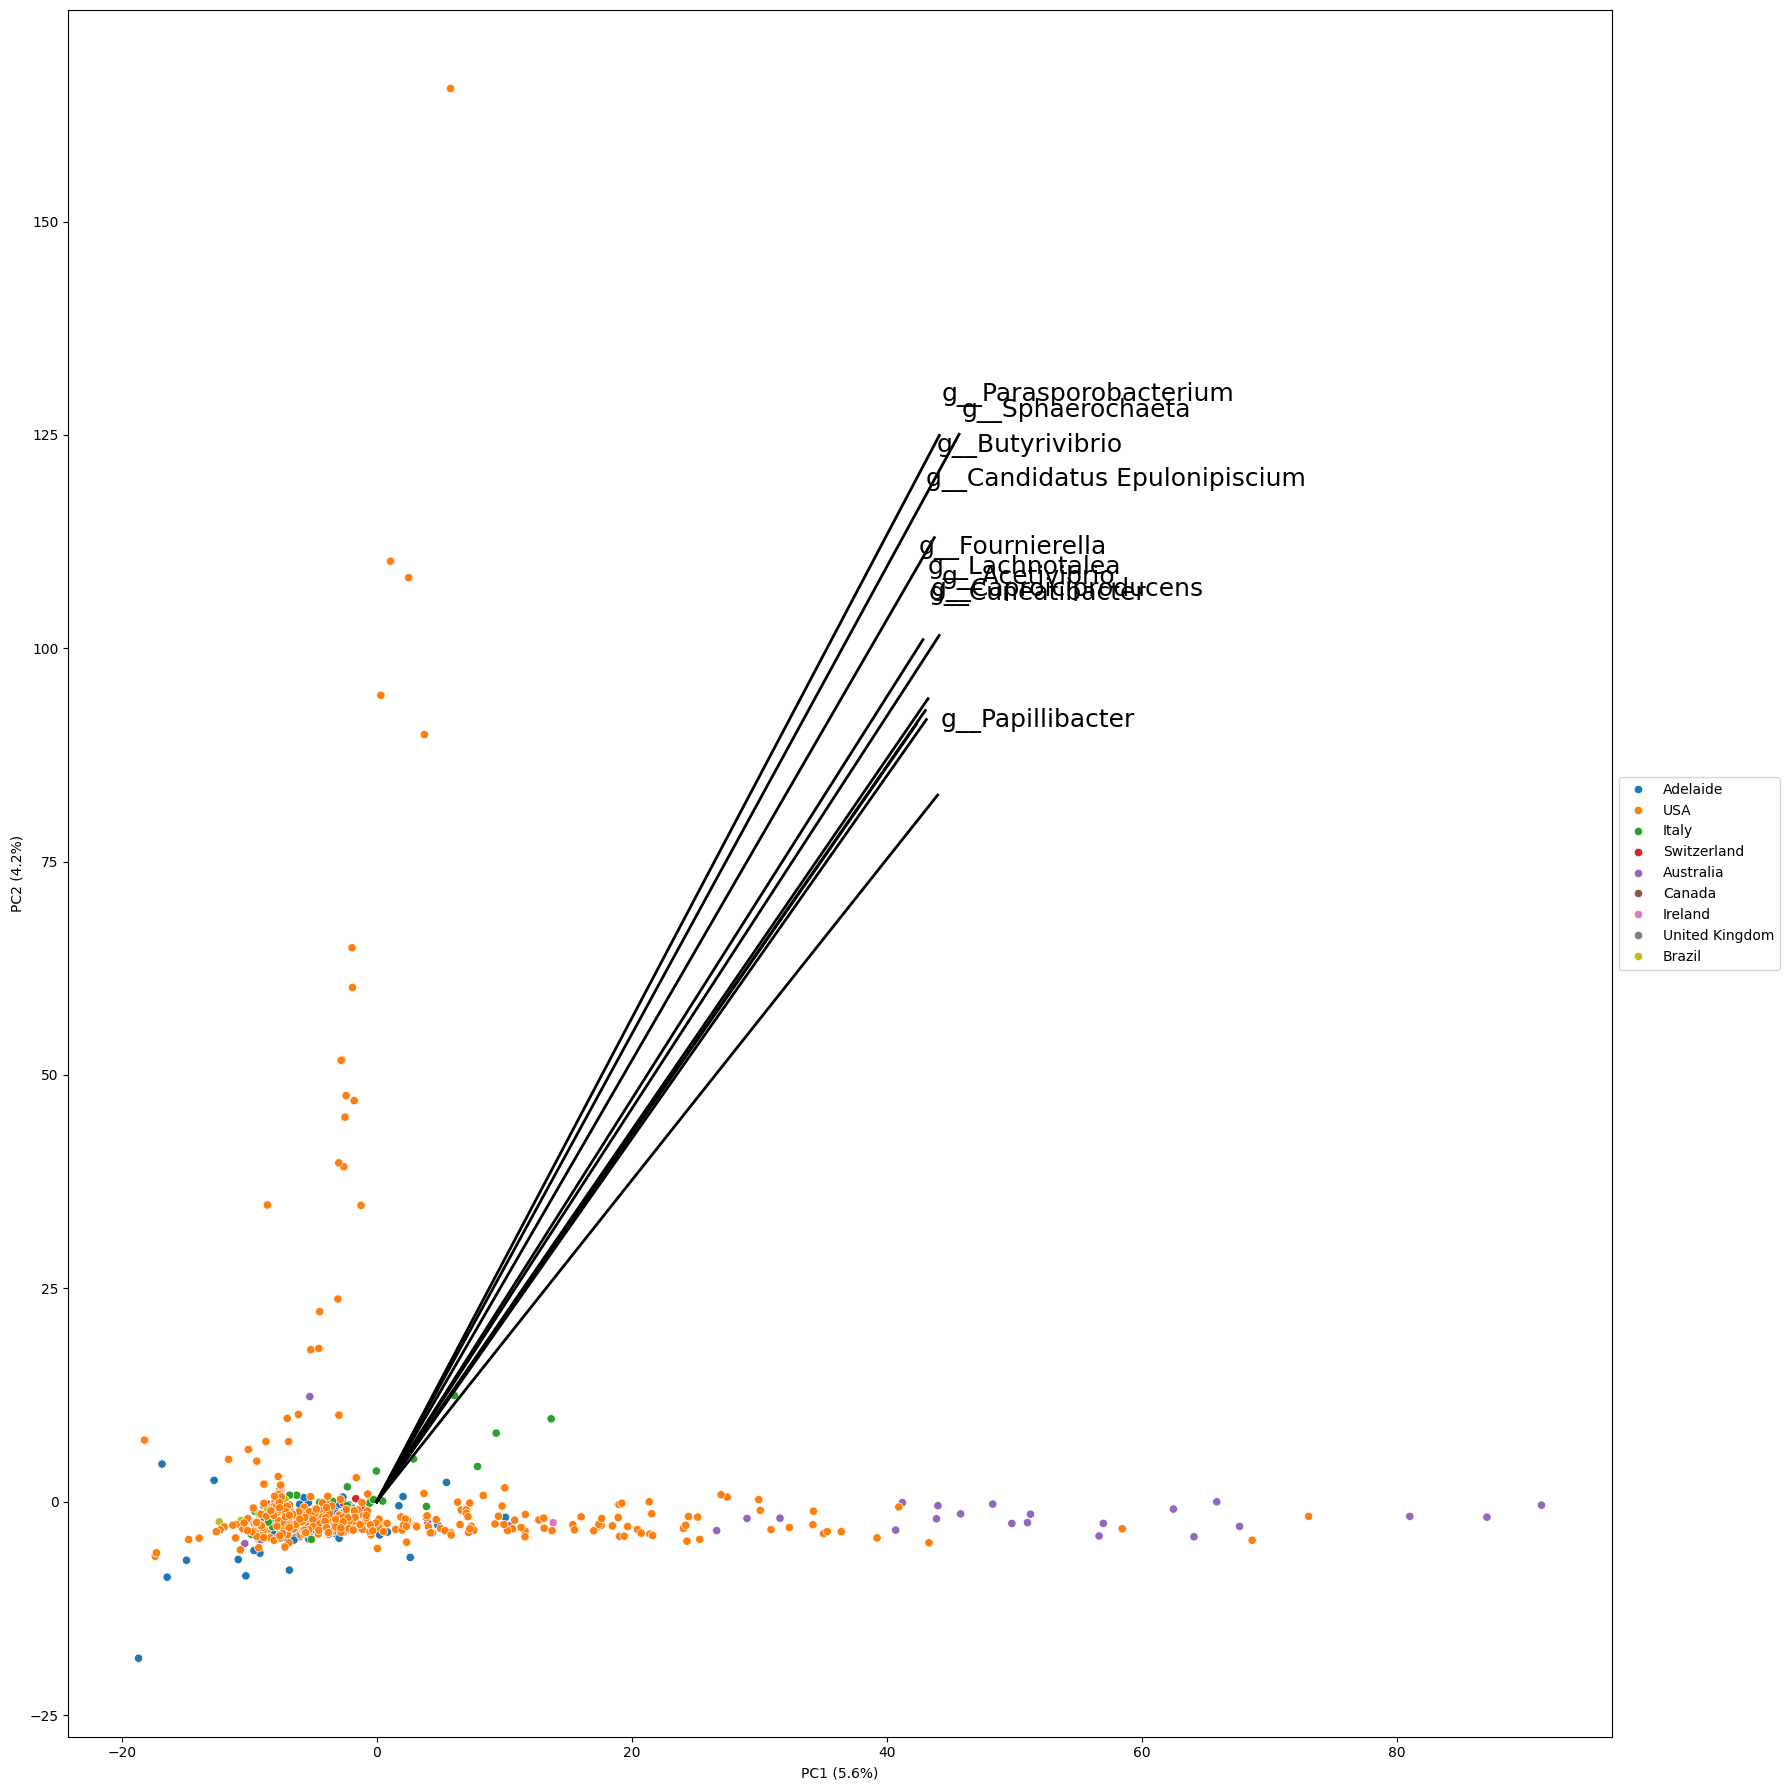

In [39]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.scatterplot(x="PC1", y="PC2", hue='Country', legend=True, data=pcloc, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
l = ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
l = ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
# get the 5 largest loadings
ldf = loadings.loc[loadings.abs().nlargest(10, ['PC1', 'PC2']).index]
# get the maximum values for x and y for the loadings and the PCA
mlx = max(ldf.PC1)
mly = max(ldf.PC2)
mpx = max(pct_df.PC1)
mpy = max(pct_df.PC2)

c = 0
for i, l in ldf.iterrows():
    c+=2
    # scale the loadings to fit the figure
    ex = ( l.PC1 * (mpx/mlx) ) / 2
    ey = ( l.PC2 * (mpy/mly) ) / 2
    # add the text and the line
    plt.text(ex+0.2, ey+c, i, fontsize=18)
    plt.plot([0, ex ], [0, ey ], 'k-', lw=2)

plt.tight_layout()

# Phylum Level (without Eukaryotes)

In [40]:
taxon = pd.read_csv("OtherSequences/all_taxa.tsv.gz", compression='gzip',  delimiter="\t")
taxon[taxon['Superkingdom'] == 's__Eukaryota']['Genus']

106809         g__Cafeteria
106810         g__Cafeteria
106811      g__Blastocystis
106812      g__Blastocystis
106813      g__Blastocystis
                ...        
112426         g__Coemansia
112427         g__Linderina
112428     g__Piptocephalis
112429       g__Syncephalis
112430    g__Thamnocephalis
Name: Genus, Length: 5622, dtype: object

### Read the Adelaide data without the Eukaryotes

In [41]:
adl = pd.read_csv("Adelaide/CF_Taxonomy/phylum.tsv.gz", compression='gzip', delimiter="\t")
adl = adl.rename(columns={"#NAME":"Accession"})
adl = adl.set_index("Accession")
adl = adl[~adl.index.isin(taxon[taxon['Superkingdom'] == 's__Eukaryota']['Phylum'])]
adl = adl.reindex(natsorted(adl.columns), axis=1)
adl = adl.T
# normalise the data by the row sum before we add the label
adl = adl.div(adl.sum(axis=1), axis=0)
adl['geo_loc_name_country_calc'] = "Adelaide"
adl

Accession           p__Candidatus Aerophobetes  p__Candidatus Moranbacteria  \
623361_20180123_S                 2.929748e-06                 1.464874e-06   
634207_20180510_S                 2.620351e-06                 4.526061e-06   
634207_20180517_S                 1.607524e-06                 2.411286e-06   
639354_20171206_S                 0.000000e+00                 0.000000e+00   
642660_20180601_S                 7.472328e-07                 7.472328e-07   
...                                        ...                          ...   
1690154_20180406_S                0.000000e+00                 4.520348e-07   
1723809_20180227_S                2.051949e-06                 4.983306e-06   
1834617_20180501_S                0.000000e+00                 1.314723e-06   
1845116_20180403_S                2.082969e-06                 7.030020e-06   
1862551_20180123_S                0.000000e+00                 0.000000e+00   

Accession           p__candidate division WOR-3  p__candidate division LCP-89  \
623361_20180123_S                  8.300951e-06                      0.000000   
634207_20180510_S                  2.763279e-05                      0.000000   
634207_20180517_S                  2.009405e-05                      0.000000   
639354_20171206_S                  2.169244e-06                      0.000000   
642660_20180601_S                  0.000000e+00                      0.000002   
...                                         ...                           ...   
1690154_20180406_S                 4.520348e-07                      0.000000   
1723809_20180227_S                 4.690170e-06                      0.000000   
1834617_20180501_S                 2.191205e-06                      0.000000   
1845116_20180403_S                 1.067522e-05                      0.000000   
1862551_20180123_S                 1.170424e-05                      0.000000   

Accession           p__Candidatus Marsarchaeota  \
623361_20180123_S                  4.882913e-07   
634207_20180510_S                  1.191069e-06   
634207_20180517_S                  8.037619e-07   
639354_20171206_S                  0.000000e+00   
642660_20180601_S                  0.000000e+00   
...                                         ...   
1690154_20180406_S                 4.520348e-07   
1723809_20180227_S                 0.000000e+00   
1834617_20180501_S                 1.314723e-06   
1845116_20180403_S                 2.603711e-06   
1862551_20180123_S                 0.000000e+00   

Accession           p__Candidatus Harrisonbacteria  p__Aquificae  \
623361_20180123_S                     0.000000e+00      0.000014   
634207_20180510_S                     2.382137e-07      0.000024   
634207_20180517_S                     0.000000e+00      0.000006   
639354_20171206_S                     0.000000e+00      0.000009   
642660_20180601_S                     7.472328e-07      0.000005   
...                                            ...           ...   
1690154_20180406_S                    9.040696e-07      0.000004   
1723809_20180227_S                    0.000000e+00      0.000010   
1834617_20180501_S                    0.000000e+00      0.000007   
1845116_20180403_S                    1.041484e-06      0.000016   
1862551_20180123_S                    0.000000e+00      0.000008   

Accession           p__Fusobacteria  p__Candidatus Fraserbacteria  \
623361_20180123_S          0.034295                  0.000000e+00   
634207_20180510_S          0.049640                  0.000000e+00   
634207_20180517_S          0.011351                  0.000000e+00   
639354_20171206_S          0.017259                  0.000000e+00   
642660_20180601_S          0.003924                  0.000000e+00   
...                             ...                           ...   
1690154_20180406_S         0.003243                  0.000000e+00   
1723809_20180227_S         0.033495                  2.931356e-07   
1834617_20180501_S         

### Read the Worldwide data without the Eukaryotes

In [42]:
wlt = pd.read_csv("OtherSequences/mmseqs_taxonomy/phylum.tsv.gz", compression='gzip',  delimiter="\t")
wlt = wlt.rename(columns={"#NAME":"Accession"})
wlt = wlt.set_index('Accession')
wlt = wlt.reindex(natsorted(wlt.columns), axis=1)
wlt = wlt[~wlt.index.isin(taxon[taxon['Superkingdom'] == 's__Eukaryota']['Phylum'])]
wlt = wlt.T


# read the list of selected ids
srr_wanted = set()
with open("cf_sputum_sra_ids.txt", 'r') as f:
    for l in f:
        srr_wanted.add(l.strip())
wlt = wlt[wlt.index.isin(srr_wanted)]

# normalise the data by the row sum 
wlt = wlt.div(wlt.sum(axis=1), axis=0)
six = pd.read_csv("OtherSequences/16S.tsv.gz", compression='gzip', delimiter="\t")
sr = six[six["Aligned 1 time"] > 1]
wlt = wlt[~wlt.index.isin(sr['Run'])]
wlt

Accession    p__Candidatus Altiarchaeota  p__Candidatus Falkowbacteria  \
SRR1177122                  0.000000e+00                  0.000000e+00   
SRR1180012                  0.000000e+00                  0.000000e+00   
SRR1180013                  0.000000e+00                  0.000000e+00   
SRR3284698                  0.000000e+00                  0.000000e+00   
SRR3284701                  0.000000e+00                  0.000000e+00   
...                                  ...                           ...   
SRR24155132                 4.930587e-07                  7.748065e-07   
SRR24155134                 2.289886e-06                  1.253985e-06   
SRR24155135                 3.571379e-07                  1.339267e-07   
SRR24155136                 0.000000e+00                  4.893263e-07   
SRR24155138                 5.682640e-07                  7.306251e-07   

Accession    p__Abditibacteriota  p__Cressdnaviricota  p__Gemmatimonadetes  \
SRR1177122          0.000000e+00         0.000000e+00             0.000005   
SRR1180012          0.000000e+00         0.000000e+00             0.000007   
SRR1180013          0.000000e+00         0.000000e+00             0.000034   
SRR3284698          0.000000e+00         0.000000e+00             0.000034   
SRR3284701          0.000000e+00         0.000000e+00             0.000030   
...                          ...                  ...                  ...   
SRR24155132         1.408739e-07         0.000000e+00             0.000029   
SRR24155134         0.000000e+00         0.000000e+00             0.000018   
SRR24155135         4.464224e-08         0.000000e+00             0.000005   
SRR24155136         2.796150e-07         6.990376e-08             0.000005   
SRR24155138         1.461250e-06         0.000000e+00             0.000013   

Accession    p__Candidatus Huberarchaea  p__Candidatus Shapirobacteria  \
SRR1177122                          0.0                   0.000000e+00   
SRR1180012                          0.0                   0.000000e+00   
SRR1180013                          0.0                   0.000000e+00   
SRR3284698                          0.0                   0.000000e+00   
SRR3284701                          0.0                   0.000000e+00   
...                                 ...                            ...   
SRR24155132                         0.0                   2.113109e-07   
SRR24155134                         0.0                   5.452110e-08   
SRR24155135                         0.0                   0.000000e+00   
SRR24155136                         0.0                   1.048556e-06   
SRR24155138                         0.0                   2.922500e-06   

Accession    p__Candidatus Berkelbacteria  p__Candidatus Aerophobetes  \
SRR1177122                   4.530052e-06                0.000000e+00   
SRR1180012                   7.007512e-06                0.000000e+00   
SRR1180013                   0.000000e+00                0.000000e+00   
SRR3284698                   0.000000e+00                4.030105e-06   
SRR3284701                   2.742634e-06                0.000000e+00   
...                                   ...                         ...   
SRR24155132                  2.042672e-06                3.240100e-06   
SRR24155134                  1.799196e-06                2.726055e-06   
SRR24155135                  1.473194e-06                4.017802e-07   
SRR24155136                  4.893263e-07                4.893263e-07   
SRR24155138                  1.542431e-05                4.302570e-06   

Accession    p__Candidatus Cloacimonetes  ...  p__Candidatus Riflebacteria  \
SRR1177122                      0.000005  ...                 9.060105e-06   
SRR1180012                      0.000014  ...                 0.000000e+00   
SRR1180013                      0.000034  ...                 0.000000e+00   
SRR3284698                      0.000004  ...                 0.000000e+00   
SRR3284701        

In [43]:
wmd = pd.read_csv("OtherSequences/bq-results-20230813-093918-1691921491006.tsv.gz", compression='gzip', delimiter="\t")
wma = wmd[['Accession', 'geo_loc_name_country_calc']]
wma = wma.set_index("Accession")
wldj = wlt.join(wma,  how='inner')
comb = pd.concat([adl, wldj], axis=0)
locs = comb[['geo_loc_name_country_calc']]
locs = locs.rename(columns={"geo_loc_name_country_calc": "Country"})
df = comb.drop(['geo_loc_name_country_calc'], axis=1)
df = df.dropna(axis=1)
df

p__Candidatus Aerophobetes  p__Candidatus Moranbacteria  \
623361_20180123_S                2.929748e-06                 1.464874e-06   
634207_20180510_S                2.620351e-06                 4.526061e-06   
634207_20180517_S                1.607524e-06                 2.411286e-06   
639354_20171206_S                0.000000e+00                 0.000000e+00   
642660_20180601_S                7.472328e-07                 7.472328e-07   
...                                       ...                          ...   
SRR24155132                      3.240100e-06                 1.056554e-05   
SRR24155134                      2.726055e-06                 6.051842e-06   
SRR24155135                      4.017802e-07                 6.964190e-06   
SRR24155136                      4.893263e-07                 1.817498e-06   
SRR24155138                      4.302570e-06                 1.972688e-05   

                   p__candidate division WOR-3  p__candidate division LCP-89  \
623361_20180123_S                 8.300951e-06                  0.000000e+00   
634207_20180510_S                 2.763279e-05                  0.000000e+00   
634207_20180517_S                 2.009405e-05                  0.000000e+00   
639354_20171206_S                 2.169244e-06                  0.000000e+00   
642660_20180601_S                 0.000000e+00                  2.241698e-06   
...                                        ...                           ...   
SRR24155132                       7.325443e-06                  0.000000e+00   
SRR24155134                       1.690154e-06                  5.452110e-08   
SRR24155135                       1.339267e-06                  0.000000e+00   
SRR24155136                       6.990376e-07                  6.990376e-08   
SRR24155138                       8.199237e-06                  8.118057e-08   

                   p__Candidatus Marsarchaeota  \
623361_20180123_S                 4.882913e-07   
634207_20180510_S                 1.191069e-06   
634207_20180517_S                 8.037619e-07   
639354_20171206_S                 0.000000e+00   
642660_20180601_S                 0.000000e+00   
...                                        ...   
SRR24155132                       2.817478e-07   
SRR24155134                       6.542532e-07   
SRR24155135                       4.464224e-08   
SRR24155136                       9.786526e-07   
SRR24155138                       8.118057e-08   

                   p__Candidatus Harrisonbacteria  p__Aquificae  \
623361_20180123_S                    0.000000e+00      0.000014   
634207_20180510_S                    2.382137e-07      0.000024   
634207_20180517_S                    0.000000e+00      0.000006   
639354_20171206_S                    0.000000e+00      0.000009   
642660_20180601_S                    7.472328e-07      0.000005   
...                                           ...           ...   
SRR24155132                          0.000000e+00      0.000011   
SRR24155134                          3.271266e-07      0.000009   
SRR24155135                          1.044628e-05      0.000002   
SRR24155136                          9.087488e-07      0.000013   
SRR24155138                          0.000000e+00      0.000009   

                   p__Fusobacteria  p__Candidatus Fraserbacteria  \
623361_20180123_S         0.034295                  0.000000e+00   
634207_20180510_S         0.049640                  0.000000e+00   
634207_20180517_S         0.011351                  0.000000e+00   
639354_20171206_S         0.017259                  0.000000e+00   
642660_20180601_S         0.003924                  0.000000e+00   
...                            ...                           ...   
SRR24155132               0.000319                  0.000000e+00   
SRR24155134               0.000330                  1.090422e-07   
SRR24155135               0.000085                  4.464224e-08   
SRR24155136               0.000290 

In [44]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
pca = PCA(n_components=4)
pca.fit(df_scaled)
dft_pca = pca.transform(df_scaled)
zipped = list(zip(dft_pca[:,0],
                  dft_pca[:,1],
                  dft_pca[:,2],
                  dft_pca[:,3],
                  list(df.index),
                 ))
pct_df = pd.DataFrame(zipped, columns=['PC1', 'PC2', 'PC3', 'PC4', "Accession"])
pcloc = pct_df.set_index("Accession").join(locs, how="inner")
pcloc = pcloc[pcloc['Country'] != 'uncalculated']
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=df.columns)
loadings.head(3)

PC1       PC2       PC3       PC4
p__Candidatus Aerophobetes   0.078660  0.024871 -0.066599 -0.054103
p__Candidatus Moranbacteria  0.120630 -0.042649 -0.011556  0.035646
p__candidate division WOR-3  0.144431 -0.042518 -0.075948 -0.018042

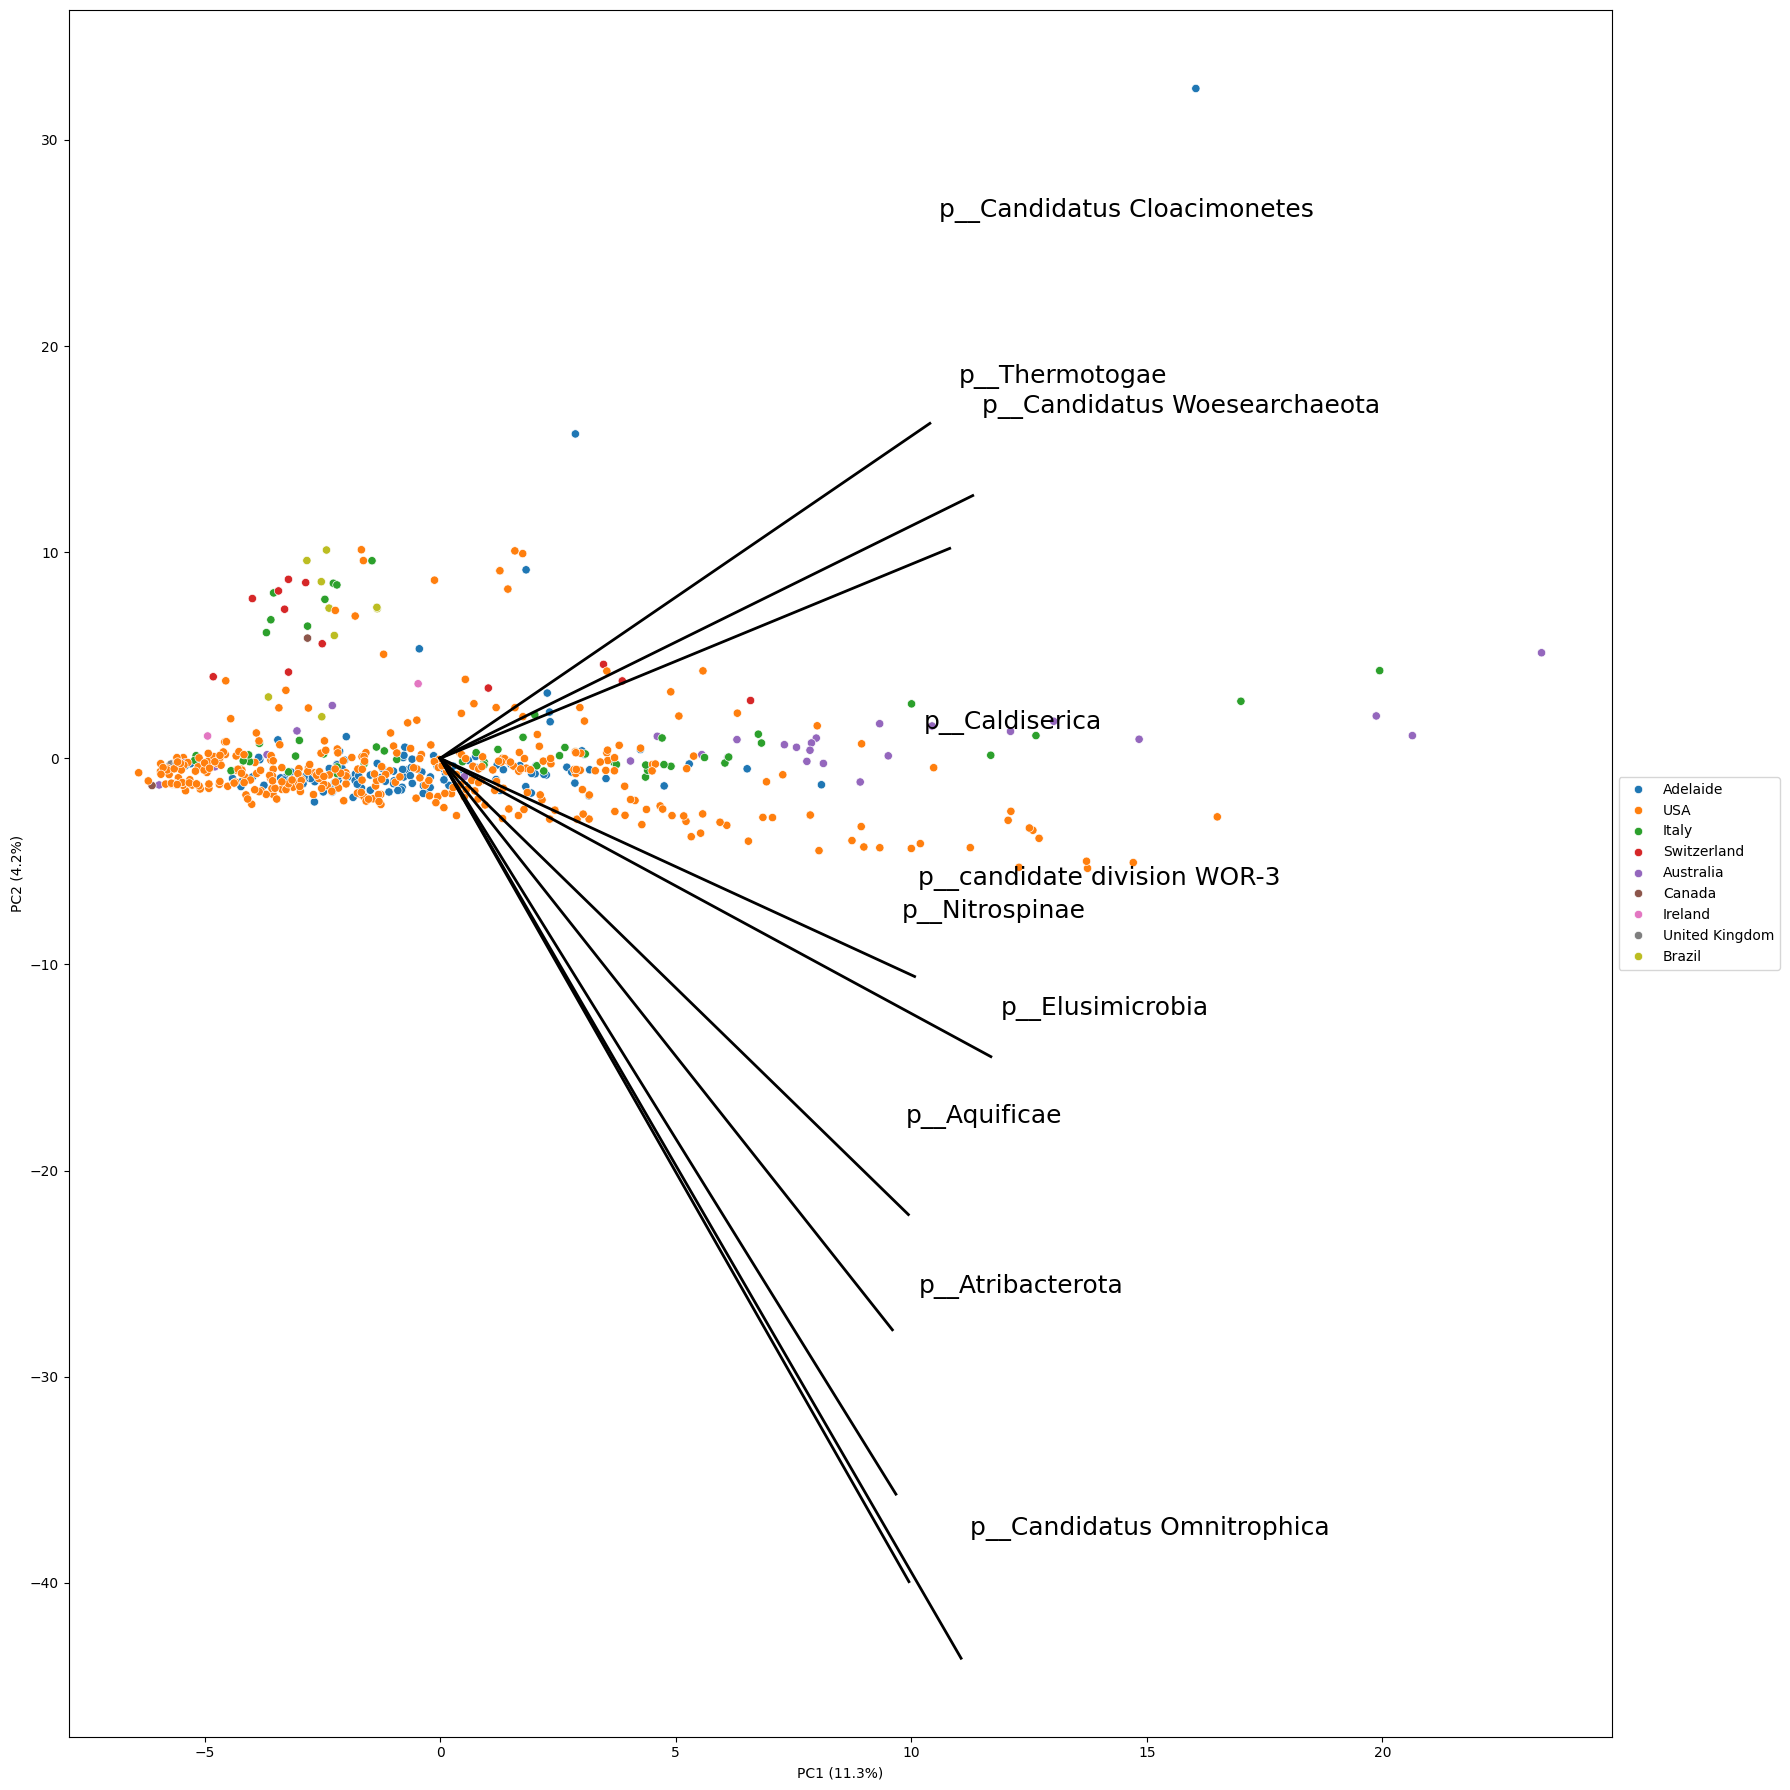

In [45]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.scatterplot(x="PC1", y="PC2", hue='Country', legend=True, data=pcloc, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
l = ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
l = ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
# get the 5 largest loadings
ldf = loadings.loc[loadings.abs().nlargest(10, ['PC1', 'PC2']).index]
# get the maximum values for x and y for the loadings and the PCA
mlx = max(ldf.PC1)
mly = max(ldf.PC2)
mpx = max(pct_df.PC1)
mpy = max(pct_df.PC2)

c = 0
for i, l in ldf.iterrows():
    c+=2
    # scale the loadings to fit the figure
    ex = ( l.PC1 * (mpx/mlx) ) / 2
    ey = ( l.PC2 * (mpy/mly) ) / 2
    # add the text and the line
    plt.text(ex+0.2, ey+c, i, fontsize=18)
    plt.plot([0, ex ], [0, ey ], 'k-', lw=2)

plt.tight_layout()
fig.savefig("Worldwide_phylum.png")

In [46]:
df['p__Candidatus Cloacimonetes'].sort_values()

1162967_20180116_S     0.000000
SRR3284701             0.000000
SRR19051567            0.000000
SRR19051570            0.000000
SRR19051586            0.000000
                         ...   
650003_20180213_S      0.000073
SRR8482173             0.000075
SRR11440773            0.000075
SRR8482117             0.000076
768745_20190228_BAL    0.000273
Name: p__Candidatus Cloacimonetes, Length: 611, dtype: float64

In [47]:
df.loc['768745_20190228_S', 'p__Candidatus Cloacimonetes']

1.5150425752642336e-05

In [48]:
df.loc['768745_20190228_BAL', 'p__Candidatus Cloacimonetes']

0.0002725538293813028

# MASH Distances

I calculated all pairwise mash distances. Distances are for the R1 and R2 reads.

From                 To  Distance        p-value  \
0             SRR10267760        SRR10267760  0.000000   0.000000e+00   
1             SRR10267761        SRR10267760  0.122140  9.205380e-140   
2             SRR10267762        SRR10267760  0.098138  9.371560e-257   
3             SRR10267763        SRR10267760  0.109331  2.501330e-204   
4             SRR10267765        SRR10267760  0.128270  2.206470e-136   
...                   ...                ...       ...            ...   
394379  895293_20180502_S  983493_20180123_S  0.098138  4.563390e-237   
394380  896213_20180427_S  983493_20180123_S  0.154223   9.761470e-69   
394381  913873_20180417_S  983493_20180123_S  0.178173   6.960310e-42   
394382  980574_20180403_S  983493_20180123_S  0.111073  7.693610e-173   
394383  983493_20180123_S  983493_20180123_S  0.000000   0.000000e+00   

            kmers  
0       1000/1000  
1         40/1000  
2         68/1000  
3         53/1000  
4         35/1000  
...           ...  
394379    68/1000  
394380    20/1000  
394381    12/1000  
394382    51/1000  
394383  1000/1000  

[394384 rows x 5 columns]

To                  1068841_20180306_S  1112926_20171212_S  \
From                                                         
1068841_20180306_S            0.000000            0.077463   
1112926_20171212_S            0.077463            0.000000   
1128691_20171206_S            0.167688            0.111073   
1128691_20171218_S            0.161822            0.114780   
1128691_20180116_S            0.219531            0.133864   
...                                ...                 ...   
SRR8482186                    0.219531            0.142009   
SRR8482187                    0.129604            0.099470   
SRR8482188                    0.156619            0.111073   
SRR8482189                    0.112887            0.096846   
SRR8482190                    0.114780            0.092618   

To                  1128691_20171206_S  1128691_20171218_S  \
From                                                         
1068841_20180306_S            0.167688            0.161822   
1112926_20171212_S            0.111073            0.114780   
1128691_20171206_S            0.000000            0.051920   
1128691_20171218_S            0.051920            0.000000   
1128691_20180116_S            0.051725            0.054997   
...                                ...                 ...   
SRR8482186                    0.061843            0.059574   
SRR8482187                    0.075541            0.079484   
SRR8482188                    0.062632            0.065394   
SRR8482189                    0.108487            0.107658   
SRR8482190                    0.102997            0.102997   

To                  1128691_20180116_S  1162967_20180116_S  \
From                                                         
1068841_20180306_S            0.219531            0.149777   
1112926_20171212_S            0.133864            0.104495   
1128691_20171206_S            0.051725            0.063168   
1128691_20171218_S            0.054997            0.066265   
1128691_20180116_S            0.000000            0.063987   
...                                ...                 ...   
SRR8482186                    0.050200            0.066265   
SRR8482187                    0.074070            0.074070   
SRR8482188                    0.062104            0.064825   
SRR8482189                    0.108487            0.098798   
SRR8482190                    0.102268            0.096846   

To                  1255498_20171212_S  1282052_20180206_S  \
From                                                         
1068841_20180306_S            0.088783            0.113823   
1112926_20171212_S            0.081179            0.072306   
1128691_20171206_S            0.136948            0.106047   
1128691_20171218_S            0.135380            0.100846   
1128691_20180116_S            0.219531            0.115759   
...                                ...                 ...   
SRR8482186                    0.219531            0.119909   
SRR8482187                    0.135380            0.101551   
SRR8482188                    0.130979            0.102268   
SRR8482189                    0.110193            0.098798   
SRR8482190                    0.115759            0.100152   

To                  1316935_20180417_S  1316979_20171215_S  ...  SRR8482180  \
From                                                        ...               
1068841_20180306_S            0.088264            0.094378  ...    0.076683   
1112926_20171212_S            0.083404            0.088264  ...    0.079901   
1128691_20171206_S            0.130979            0.164662  ...    0.140258   
1128691_20171218_S            0.125715            0.143830  ...    0.133864   
1128691_20180116_S            0.138572            0.210897  ...    0.154223   
...                                ...                 ...  ...         ...   
SRR8482186                    0.143830            0.210897  ...    0.159146   
SRR8482187                    0.114780            0.138572  .

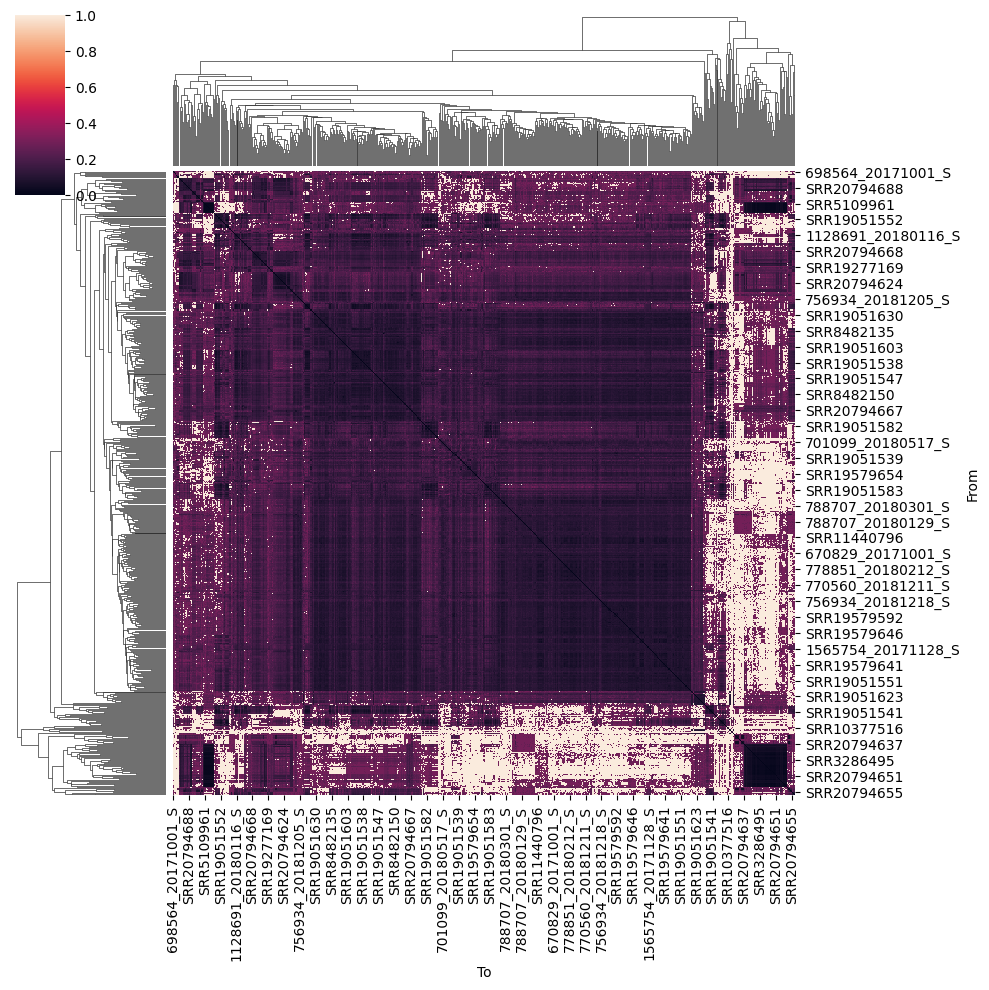

msh: (394384, 5) locs: (611, 1)
msf: (249944, 6) locs: (611, 1)
mst: (158404, 7) locs: (611, 1)


From                 To  Distance        p-value  \
10693         SRR10590818        SRR10590818  0.000000   0.000000e+00   
10696         SRR11440762        SRR10590818  0.295981   2.420020e-02   
10698         SRR11440764        SRR10590818  1.000000   1.000000e+00   
10699         SRR11440765        SRR10590818  1.000000   1.000000e+00   
10700         SRR11440766        SRR10590818  1.000000   1.000000e+00   
...                   ...                ...       ...            ...   
394379  895293_20180502_S  983493_20180123_S  0.098138  4.563390e-237   
394380  896213_20180427_S  983493_20180123_S  0.154223   9.761470e-69   
394381  913873_20180417_S  983493_20180123_S  0.178173   6.960310e-42   
394382  980574_20180403_S  983493_20180123_S  0.111073  7.693610e-173   
394383  983493_20180123_S  983493_20180123_S  0.000000   0.000000e+00   

            kmers From Country To Country  
10693   1000/1000       Canada     Canada  
10696      1/1000          USA     Canada  
10698      0/1000          USA     Canada  
10699      0/1000          USA     Canada  
10700      0/1000          USA     Canada  
...           ...          ...        ...  
394379    68/1000     Adelaide   Adelaide  
394380    20/1000     Adelaide   Adelaide  
394381    12/1000     Adelaide   Adelaide  
394382    51/1000     Adelaide   Adelaide  
394383  1000/1000     Adelaide   Adelaide  

[158404 rows x 7 columns]

/local/edwa0468/2510036/ipykernel_2242469/1340411567.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


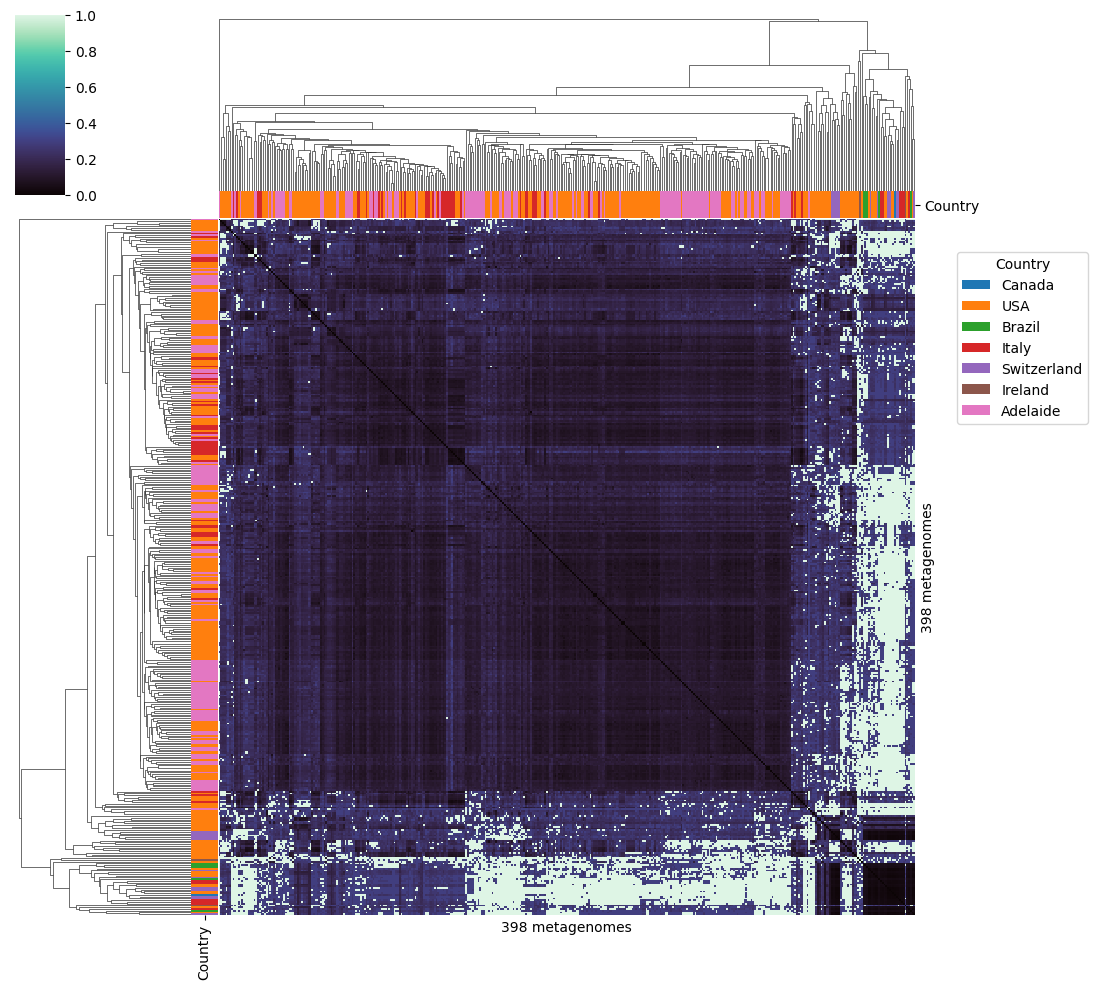

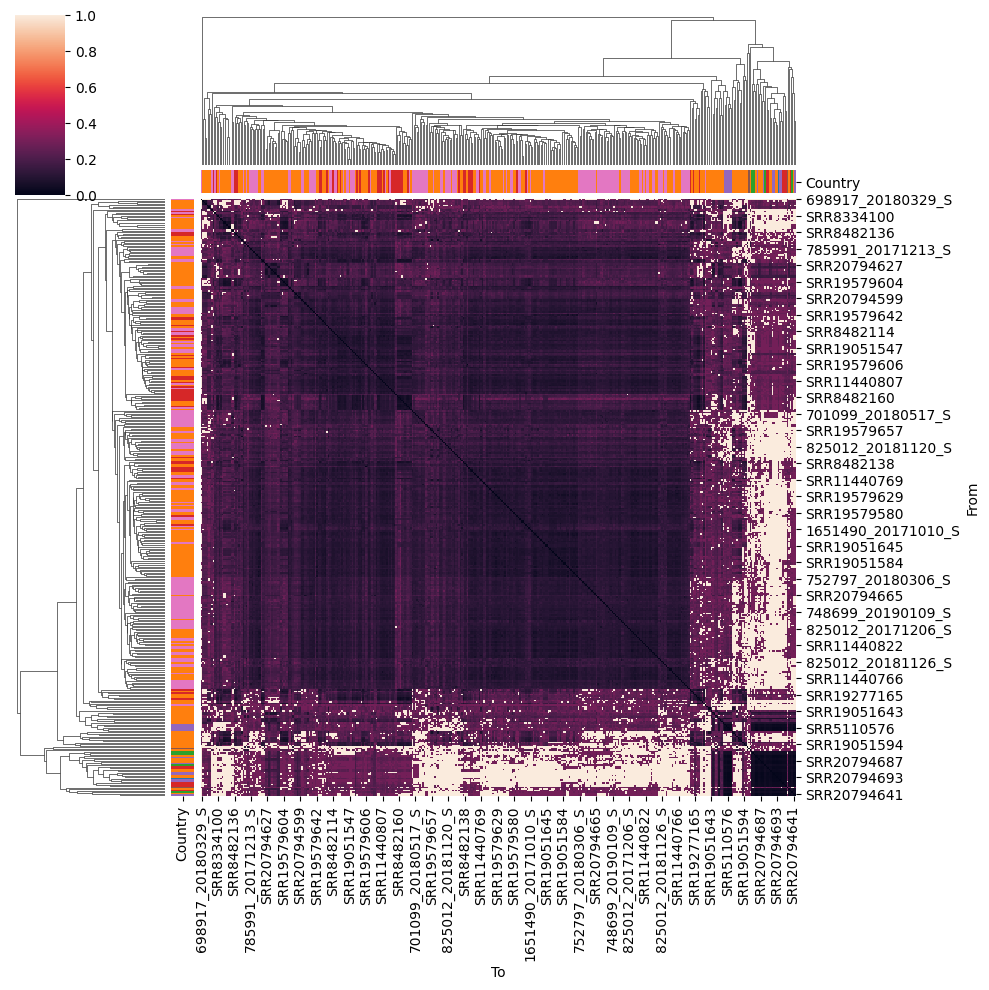

In [80]:
g = sns.clustermap(mstp, 
               row_cluster=True, col_cluster=True, 
               row_colors=rc, col_colors=cc)

# Pulling out specific groups.

Let's start by pulling out a few specific groups to double check what we are looking at. We'll start with samples where the distance _to_ Adelaide is 1

This gives 3,733 pairs, from 378 metagenomes none of which have _any_ k-mers in common with the Adelaide samples.

In [86]:
mst[(mst['From Country'] == 'Adelaide') & (mst['Distance'] == 1)]

From                 To  Distance  p-value   kmers  \
11177   1068841_20180306_S        SRR10590818       1.0      1.0  0/1000   
11183   1255498_20171212_S        SRR10590818       1.0      1.0  0/1000   
11185   1316935_20180417_S        SRR10590818       1.0      1.0  0/1000   
11186   1316979_20171215_S        SRR10590818       1.0      1.0  0/1000   
11188   1465461_20180406_S        SRR10590818       1.0      1.0  0/1000   
...                    ...                ...       ...      ...     ...   
389292   698917_20180329_S  848255_20190228_S       1.0      1.0  0/1000   
389914   698564_20171001_S  875028_20180115_S       1.0      1.0  0/1000   
389920   698917_20180329_S  875028_20180115_S       1.0      1.0  0/1000   
393682   698564_20171001_S  980574_20180403_S       1.0      1.0  0/1000   
393688   698917_20180329_S  980574_20180403_S       1.0      1.0  0/1000   

       From Country To Country  
11177      Adelaide     Canada  
11183      Adelaide     Canada  
11185      Adelaide     Canada  
11186      Adelaide     Canada  
11188      Adelaide     Canada  
...             ...        ...  
389292     Adelaide   Adelaide  
389914     Adelaide   Adelaide  
389920     Adelaide   Adelaide  
393682     Adelaide   Adelaide  
393688     Adelaide   Adelaide  

[3733 rows x 7 columns]

### Filter by things that are somewhat similar to Adelaide samples!

This filters by all samples where _all_ of the distances to adelaide are > `cutoff`. Note that we need ~0.2 maximum!

In [97]:
cutoff = 0.5
adelaide_distances = mst[mst['From Country'] == 'Adelaide']
looking_for = adelaide_distances.groupby('To')['Distance'].apply(lambda x: (x > cutoff).all())
print(f"A total of {len(looking_for[looking_for].index.tolist())} samples have _all_ samples > {cutoff} from Adelaide")

A total of 0 samples have _all_ samples > 0.5 from Adelaide


In [98]:
cutoff = 0.2
adelaide_distances = mst[mst['From Country'] == 'Adelaide']
looking_for = adelaide_distances.groupby('To')['Distance'].apply(lambda x: (x > cutoff).all())
print(f"A total of {len(looking_for[looking_for].index.tolist())} samples have _all_ samples > {cutoff} from Adelaide")

A total of 32 samples have _all_ samples > 0.2 from Adelaide


In [101]:
cutoff = 0.2
adelaide_distances = mst[mst['From Country'] == 'Adelaide']
looking_for = adelaide_distances.groupby('To')['Distance'].apply(lambda x: (x > cutoff).all())
to_skip = looking_for[looking_for].index.tolist()
to_skip

['SRR10590818',
 'SRR12149829',
 'SRR12149834',
 'SRR12149835',
 'SRR12149838',
 'SRR12149840',
 'SRR19051620',
 'SRR19051622',
 'SRR19051643',
 'SRR20794630',
 'SRR20794641',
 'SRR20794647',
 'SRR20794652',
 'SRR20794687',
 'SRR20794693',
 'SRR20794695',
 'SRR3284698',
 'SRR3284701',
 'SRR3284706',
 'SRR3286491',
 'SRR3286493',
 'SRR3286495',
 'SRR5109913',
 'SRR5109957',
 'SRR5109959',
 'SRR5109960',
 'SRR5110496',
 'SRR5110517',
 'SRR5110523',
 'SRR5110526',
 'SRR8079047',
 'SRR8079049']

### What are these?

They do not seem to have anything in common, but I don't really know for sure!

In [103]:
mst_filt = mst[~(mst['From'].isin(to_skip) | mst['To'].isin(to_skip))]
print(f"Before filtering shape: {mst.shape}\nAfter filtering shape: {mst_filt.shape}")
mst_filt

Before filtering shape: (158404, 7)
After filtering shape: (133956, 7)


From                 To  Distance        p-value  \
12580         SRR11440762        SRR11440762  0.000000   0.000000e+00   
12582         SRR11440764        SRR11440762  0.075168   0.000000e+00   
12583         SRR11440765        SRR11440762  0.094378  6.916010e-266   
12584         SRR11440766        SRR11440762  0.080748   0.000000e+00   
12585         SRR11440767        SRR11440762  0.084330   0.000000e+00   
...                   ...                ...       ...            ...   
394379  895293_20180502_S  983493_20180123_S  0.098138  4.563390e-237   
394380  896213_20180427_S  983493_20180123_S  0.154223   9.761470e-69   
394381  913873_20180417_S  983493_20180123_S  0.178173   6.960310e-42   
394382  980574_20180403_S  983493_20180123_S  0.111073  7.693610e-173   
394383  983493_20180123_S  983493_20180123_S  0.000000   0.000000e+00   

            kmers From Country To Country  
12580   1000/1000          USA        USA  
12582    115/1000          USA        USA  
12583     74/1000          USA        USA  
12584    101/1000          USA        USA  
12585     93/1000          USA        USA  
...           ...          ...        ...  
394379    68/1000     Adelaide   Adelaide  
394380    20/1000     Adelaide   Adelaide  
394381    12/1000     Adelaide   Adelaide  
394382    51/1000     Adelaide   Adelaide  
394383  1000/1000     Adelaide   Adelaide  

[133956 rows x 7 columns]

/local/edwa0468/2510036/ipykernel_2242469/1830619862.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


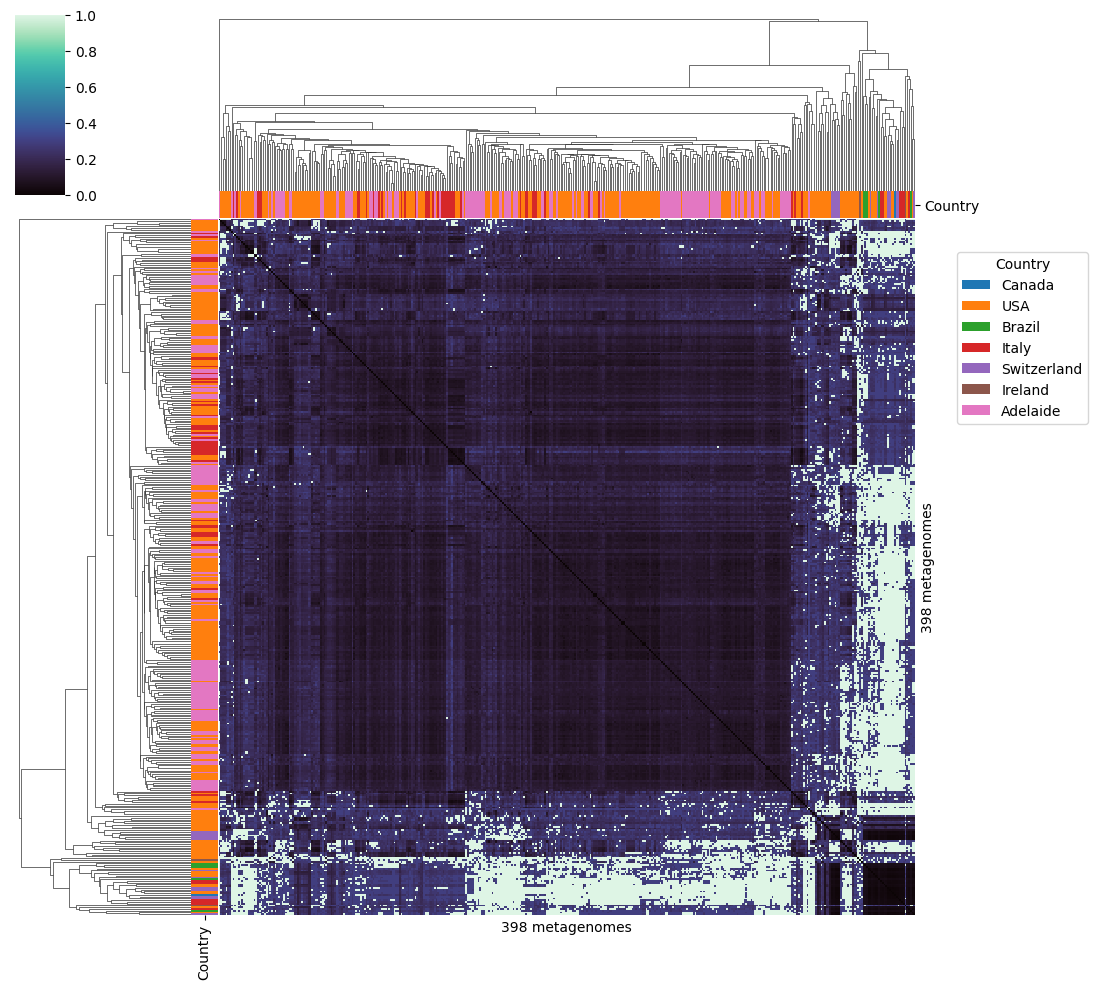

In [104]:
cg = sns.clustermap(mstp,
                   row_cluster=True, col_cluster=True, 
                   row_colors=rc, col_colors=cc,
                   yticklabels=False,xticklabels=False,
                   cmap="mako")
ax = cg.ax_heatmap
ax.set_ylabel("398 metagenomes")
ax.set_xlabel("398 metagenomes")
handles = [Patch(facecolor=lut[name]) for name in lut]
l = plt.legend(handles, lut, title='Country',
           bbox_to_anchor=(1.1, 0.75), bbox_transform=plt.gcf().transFigure, loc='upper right')

plt.tight_layout()